In [3]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import pandas as pd
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [4]:
notes = pd.read_csv('mimic-iii-clinical-database-1.4/NOTEEVENTS.csv/NOTEEVENTS.csv', low_memory=False)
labevents = pd.read_csv('mimic-iii-clinical-database-1.4/LABEVENTS.csv/LABEVENTS.csv', low_memory=False)
patients = pd.read_csv('mimic-iii-clinical-database-1.4/PATIENTS.csv/PATIENTS.csv', low_memory=False)
admissions = pd.read_csv('mimic-iii-clinical-database-1.4/ADMISSIONS.csv/ADMISSIONS.csv', low_memory=False)

In [5]:
notes

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
2083175,2070657,31097,115637.0,2132-01-21,2132-01-21 03:27:00,2132-01-21 03:38:00,Nursing/other,Report,17581.0,NaN,NPN\n\n\n#1 Infant remains in RA with O2 sats...
2083176,2070658,31097,115637.0,2132-01-21,2132-01-21 09:50:00,2132-01-21 09:53:00,Nursing/other,Report,19211.0,NaN,"Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con..."
2083177,2070659,31097,115637.0,2132-01-21,2132-01-21 16:42:00,2132-01-21 16:44:00,Nursing/other,Report,20104.0,NaN,Family Meeting Note\nFamily meeting held with ...
2083178,2070660,31097,115637.0,2132-01-21,2132-01-21 18:05:00,2132-01-21 18:16:00,Nursing/other,Report,16023.0,NaN,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...


In [6]:
admissions = admissions[admissions['DIAGNOSIS'].str.contains(r'\bsepsis\b', case=False, na=False)]
admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
11,32,33,176176,2116-12-23 22:30:00,2116-12-27 12:05:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,PROTESTANT QUAKER,MARRIED,UNKNOWN/NOT SPECIFIED,2116-12-23 14:42:00,2116-12-23 23:41:00,SEPSIS;TELEMETRY,0,1
19,40,38,185910,2166-08-10 00:28:00,2166-09-04 11:30:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LONG TERM CARE HOSPITAL,Medicare,NaN,CATHOLIC,WIDOWED,WHITE,NaN,NaN,ACUTE MYOCARDIAL INFARCTION-SEPSIS,0,1
24,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2198-11-01 18:01:00,2198-11-01 23:06:00,SEPSIS,0,1
37,471,366,134462,2164-11-18 20:27:00,2164-11-22 15:18:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SINGLE,HISPANIC OR LATINO,2164-11-18 10:52:00,2164-11-18 21:31:00,SEPSIS,0,1
64,62,62,116009,2113-02-15 00:19:00,2113-02-19 15:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,NaN,NOT SPECIFIED,MARRIED,PATIENT DECLINED TO ANSWER,2113-02-14 19:55:00,2113-02-15 01:17:00,"SEPSIS,URINARY TRACT INFECTION",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58852,57781,96261,150731,2196-03-27 17:05:00,2196-04-08 12:40:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2196-03-27 15:00:00,2196-03-27 18:59:00,SEPSIS,0,1
58860,55969,90688,112686,2154-11-09 11:29:00,2154-11-13 17:30:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2154-11-09 05:33:00,2154-11-09 12:50:00,SEPSIS,0,1
58890,57483,95372,181449,2124-04-17 16:11:00,2124-04-24 15:38:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,SPAN,OTHER,MARRIED,HISPANIC OR LATINO,2124-04-17 09:52:00,2124-04-17 17:17:00,SEPSIS,0,1
58934,58557,98698,134977,2188-10-18 02:00:00,2188-10-22 15:53:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Government,ENGL,CATHOLIC,MARRIED,WHITE,2188-10-17 22:01:00,2188-10-18 03:27:00,SEPSIS,0,1


In [7]:
# Merge ADMISSIONS and PATIENTS tables
merged = pd.merge(admissions, patients, on='SUBJECT_ID', how='left')
merged['DOB'] = pd.to_datetime(merged['DOB'], format='%Y-%m-%d %H:%M:%S')
merged['ADMITTIME'] = pd.to_datetime(merged['ADMITTIME'], format='%Y-%m-%d %H:%M:%S')
merged['age'] = (merged['ADMITTIME'].dt.year - merged['DOB'].dt.year)  # Approximate age
merged.loc[(merged['ADMITTIME'].dt.month < merged['DOB'].dt.month) | 
           ((merged['ADMITTIME'].dt.month == merged['DOB'].dt.month) & 
            (merged['ADMITTIME'].dt.day < merged['DOB'].dt.day)), 'age'] -= 1

# Aggregate LABEVENTS (select top ITEMIDs as features)
top_itemids = labevents['ITEMID'].value_counts().index[:20]  #
lab_selected = labevents[labevents['ITEMID'].isin(top_itemids)]
lab_pivoted = lab_selected.pivot_table(index='HADM_ID', columns='ITEMID', 
                                       values='VALUENUM', aggfunc='mean').reset_index()
lab_pivoted.columns = ['HADM_ID'] + ['lab_' + str(col) for col in lab_pivoted.columns[1:]]

# Extract clinical notes and ensure we get the earliest ones
# Convert charttime to datetime
notes['CHARTTIME'] = pd.to_datetime(notes['CHARTTIME'], format='%Y-%m-%d %H:%M:%S')

# Get the earliest note for each admission
admission_notes = notes.sort_values('CHARTTIME')
earliest_notes = admission_notes.groupby('HADM_ID').first().reset_index()

# Extract the text from the earliest notes
nota_text = earliest_notes[['HADM_ID', 'TEXT']]

# Merge all data
final_data = pd.merge(merged, lab_pivoted, on='HADM_ID', how='left')
final_data = pd.merge(final_data, nota_text, on='HADM_ID', how='left')

# Drop rows with missing data (for simplicity—handle imputation in a real project)
final_data.dropna(subset=['TEXT', 'HOSPITAL_EXPIRE_FLAG'], inplace=True)
final_data.reset_index(drop=True, inplace=True)

# Add a feature for how early the note was taken relative to admission
final_data = pd.merge(
    final_data,
    earliest_notes[['HADM_ID', 'CHARTTIME']],
    on='HADM_ID',
    how='left'
)
final_data['hours_from_admission'] = (final_data['CHARTTIME'] - final_data['ADMITTIME']).dt.total_seconds() / 3600

In [8]:

final_data

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,lab_51248,lab_51249,lab_51250,lab_51265,lab_51277,lab_51279,lab_51301,TEXT,CHARTTIME,hours_from_admission
0,32,33,176176,2116-12-23 22:30:00,2116-12-27 12:05:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,30.471429,33.585714,90.857143,485.428571,13.500000,4.102857,24.228571,[**2116-12-23**] 8:59 PM\n CHEST (PORTABLE AP)...,2116-12-23 20:59:00,-1.516667
1,40,38,185910,2166-08-10 00:28:00,2166-09-04 11:30:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LONG TERM CARE HOSPITAL,Medicare,...,31.419355,33.600000,93.548387,117.906250,14.896774,3.172903,7.583871,[**2166-8-10**] 2:56 AM\n CHEST (PORTABLE AP) ...,2166-08-10 02:56:00,2.466667
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,33.838889,33.100000,102.333333,102.444444,15.777778,2.588333,2.533333,[**2198-11-1**] 6:42 PM\n CHEST (PORTABLE AP) ...,2198-11-01 18:42:00,-3.900000
3,471,366,134462,2164-11-18 20:27:00,2164-11-22 15:18:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,35.850000,34.450000,104.000000,199.000000,16.350000,4.000000,27.900000,[**2164-11-18**] 4:16 PM\n CT ABDOMEN W/O CONT...,2164-11-18 16:16:00,-4.183333
4,62,62,116009,2113-02-15 00:19:00,2113-02-19 15:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,...,32.120000,34.340000,93.600000,146.600000,13.700000,3.590000,9.170000,[**2113-2-14**] 10:11 PM\n CHEST (PORTABLE AP)...,2113-02-14 22:11:00,-2.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,57781,96261,150731,2196-03-27 17:05:00,2196-04-08 12:40:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,...,23.912500,31.312500,76.437500,265.062500,25.187500,3.710625,11.575000,[**2196-3-27**] 3:22 PM\n CHEST (PORTABLE AP) ...,2196-03-27 15:22:00,-1.716667
1611,55969,90688,112686,2154-11-09 11:29:00,2154-11-13 17:30:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,...,29.514286,34.371429,86.000000,316.857143,17.114286,3.387143,6.757143,[**2154-11-9**] 6:14 AM\n CHEST (PORTABLE AP) ...,2154-11-09 06:14:00,-5.250000
1612,57483,95372,181449,2124-04-17 16:11:00,2124-04-24 15:38:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,...,31.288889,34.844444,89.888889,190.555556,15.233333,3.302222,7.377778,[**2124-4-17**] 10:14 AM\n CT HEAD W/O CONTRAS...,2124-04-17 10:14:00,-5.950000
1613,58557,98698,134977,2188-10-18 02:00:00,2188-10-22 15:53:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Government,...,26.833333,33.083333,81.166667,471.333333,15.583333,4.126667,15.733333,[**2188-10-17**] 10:51 PM\n CHEST PORT. LINE P...,2188-10-17 22:51:00,-3.150000


In [9]:
final_data.columns

Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'age', 'lab_50868',
       'lab_50882', 'lab_50893', 'lab_50902', 'lab_50912', 'lab_50931',
       'lab_50960', 'lab_50970', 'lab_50971', 'lab_50983', 'lab_51006',
       'lab_51221', 'lab_51222', 'lab_51248', 'lab_51249', 'lab_51250',
       'lab_51265', 'lab_51277', 'lab_51279', 'lab_51301', 'TEXT', 'CHARTTIME',
       'hours_from_admission'],
      dtype='object')

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Select features (age, gender, and all lab results)
X_structured = final_data[['age', 'GENDER']].copy()
X_structured = pd.get_dummies(X_structured, columns=['GENDER'])  # One-hot encode gender

# Collect all lab columns dynamically
lab_columns = [col for col in final_data.columns if col.startswith('lab_')]
X_labs = final_data[lab_columns]

# Concatenate structured data and labs, handle missing values
X_all = pd.concat([X_structured, X_labs], axis=1)
X_all = X_all.fillna(X_all.median())  # Replace missing labs with median

# Standardize numerical features
scaler = StandardScaler()
X_structured_scaled = scaler.fit_transform(X_all)

# Target variable
y = final_data['HOSPITAL_EXPIRE_FLAG'].astype(int)

In [11]:
import torch
from transformers import BertTokenizer, BertModel

# PyTorch-based BioClinicalBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')
bertModel = BertModel.from_pretrained('emilyalsentzer/Bio_ClinicalBERT')

def get_bert_embeddings(texts):
    # Tokenize input with PyTorch tensors
    inputs = tokenizer(texts, padding=True, truncation=True, 
                       max_length=512, return_tensors='pt')
    
    # Disable gradient calculation (inference mode)
    with torch.no_grad():
        outputs = bertModel(**inputs)
    
    # Extract [CLS] token embeddings and convert to numpy array
    embeddings = outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()
    return embeddings



c:\Users\leon1\anaconda3\envs\mimic3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
X_structured_scaled.shape

(1615, 23)

In [13]:
X_all

,age,GENDER_F,GENDER_M,lab_50868,lab_50882,lab_50893,lab_50902,lab_50912,lab_50931,lab_50960,...,lab_51006,lab_51221,lab_51222,lab_51248,lab_51249,lab_51250,lab_51265,lab_51277,lab_51279,lab_51301
0,82,False,True,11.400000,27.400000,8.275000,104.600000,0.900000,121.000000,1.875000,...,18.800000,37.185714,12.514286,30.471429,33.585714,90.857143,485.428571,13.500000,4.102857,24.228571
1,75,False,True,9.657143,25.285714,7.859375,107.828571,1.108571,115.416667,1.845946,...,24.771429,29.436842,9.977419,31.419355,33.600000,93.548387,117.906250,14.896774,3.172903,7.583871
2,63,False,True,12.190476,18.238095,7.690000,120.571429,0.700000,160.761905,2.021053,...,26.047619,26.290476,8.733333,33.838889,33.100000,102.333333,102.444444,15.777778,2.588333,2.533333
3,52,False,True,15.666667,25.000000,7.900000,102.333333,1.466667,154.000000,1.550000,...,16.000000,41.600000,14.350000,35.850000,34.450000,104.000000,199.000000,16.350000,4.000000,27.900000
4,68,False,True,10.181818,23.272727,7.800000,109.363636,0.690909,134.090909,1.890000,...,22.454545,33.590000,11.530000,32.120000,34.340000,93.600000,146.600000,13.700000,3.590000,9.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,62,True,False,13.777778,26.185185,8.219231,103.172414,2.270370,106.333333,2.119231,...,39.481481,28.010000,8.875000,23.912500,31.312500,76.437500,265.062500,25.187500,3.710625,11.575000
1611,85,True,False,14.125000,22.625000,8.300000,104.500000,1.600000,103.500000,1.900000,...,42.888889,28.612500,10.000000,29.514286,34.371429,86.000000,316.857143,17.114286,3.387143,6.757143
1612,80,True,False,13.538462,22.538462,7.936364,93.076923,0.900000,153.230769,2.190909,...,27.615385,29.633333,10.344444,31.288889,34.844444,89.888889,190.555556,15.233333,3.302222,7.377778
1613,45,False,True,9.666667,23.000000,7.600000,108.500000,0.971429,132.000000,1.960000,...,7.714286,33.466667,11.066667,26.833333,33.083333,81.166667,471.333333,15.583333,4.126667,15.733333


In [14]:

n_samples = 500  # Use a common subset (e.g., first 100 rows)
y_subset = final_data['HOSPITAL_EXPIRE_FLAG'][:n_samples].astype(int)
# Example usage (adjust slice if your data is smaller)
text_embeddings = get_bert_embeddings(final_data['TEXT'].iloc[:n_samples].astype(str).tolist())

Epoch 1/200: Train Loss = 0.6658, Train AUC = 0.5060, Val Loss = 0.6603, Val AUC = 0.4026
Epoch 2/200: Train Loss = 0.6437, Train AUC = 0.5098, Val Loss = 0.6439, Val AUC = 0.4218
Epoch 3/200: Train Loss = 0.6193, Train AUC = 0.4941, Val Loss = 0.6230, Val AUC = 0.4529
Epoch 4/200: Train Loss = 0.5905, Train AUC = 0.5232, Val Loss = 0.6031, Val AUC = 0.4800
Epoch 5/200: Train Loss = 0.5675, Train AUC = 0.5516, Val Loss = 0.5947, Val AUC = 0.5195
Epoch 6/200: Train Loss = 0.5519, Train AUC = 0.5610, Val Loss = 0.5922, Val AUC = 0.5624
Epoch 7/200: Train Loss = 0.5712, Train AUC = 0.5505, Val Loss = 0.5899, Val AUC = 0.5822
Epoch 8/200: Train Loss = 0.5437, Train AUC = 0.6578, Val Loss = 0.5787, Val AUC = 0.6471
Epoch 9/200: Train Loss = 0.5398, Train AUC = 0.6468, Val Loss = 0.5683, Val AUC = 0.6957
Epoch 10/200: Train Loss = 0.5290, Train AUC = 0.6901, Val Loss = 0.5619, Val AUC = 0.7149
Epoch 11/200: Train Loss = 0.5304, Train AUC = 0.7005, Val Loss = 0.5530, Val AUC = 0.7278
Epoch 12

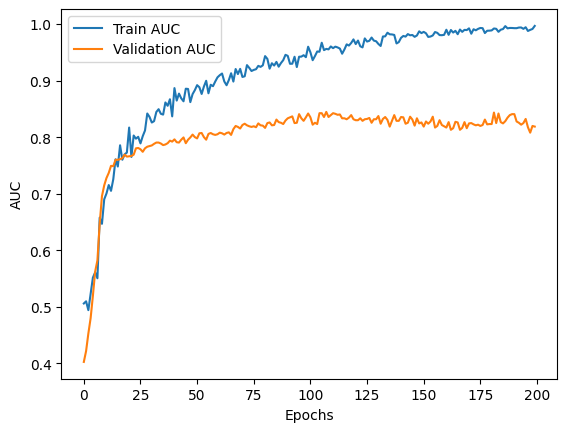

In [15]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


class FusionModel(nn.Module):
    def __init__(self, structured_input_size):
        super(FusionModel, self).__init__()
        
        # Text Pathway - reduced complexity
        self.text_dense = nn.Linear(768, 256)
        self.text_dropout = nn.Dropout(0.5)  # Higher dropout to prevent overfitting
        
        # Structured Pathway - reduced complexity
        self.structured_dense = nn.Linear(structured_input_size, 128)
        self.structured_dropout = nn.Dropout(0.5)  # Higher dropout
        
        # Combined Pathway - fewer layers and neurons
        self.combined_dense1 = nn.Linear(384, 256)  # 256 + 128 = 384
        self.combined_dropout1 = nn.Dropout(0.5)
        self.combined_dense2 = nn.Linear(256, 64)
        self.combined_dropout2 = nn.Dropout(0.3)
        
        # Output
        self.output_layer = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
        
        # Activation
        self.relu = nn.ReLU()

    def forward(self, text, structured):
        # Text pathway
        x_text = self.relu(self.text_dense(text))
        x_text = self.text_dropout(x_text)
        
        # Structured pathway 
        x_structured = self.relu(self.structured_dense(structured))
        x_structured = self.structured_dropout(x_structured)
        
        # Combine
        combined = torch.cat((x_text, x_structured), dim=1)
        
        # Combined pathway
        combined = self.relu(self.combined_dense1(combined))
        combined = self.combined_dropout1(combined)
        combined = self.relu(self.combined_dense2(combined))
        combined = self.combined_dropout2(combined)
        
        # Output
        output = self.sigmoid(self.output_layer(combined))
        return output





cutoff = 0.8 * n_samples
cutoff = int(cutoff)  # Ensure integer for slicing
# Split into training/validation (80/20)
X_text_train, X_text_val = text_embeddings[:cutoff], text_embeddings[cutoff:n_samples]
X_struct_train, X_struct_val = X_structured_scaled[:cutoff], X_structured_scaled[cutoff:n_samples]
y_train, y_val = y_subset.values[:cutoff], y_subset.values[cutoff:n_samples]  # Sync with the subset
# Convert to PyTorch tensors (synced to n_samples)
X_text_train_t = torch.tensor(X_text_train, dtype=torch.float32)
X_struct_train_t = torch.tensor(X_struct_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_text_val_t = torch.tensor(X_text_val, dtype=torch.float32)
X_struct_val_t = torch.tensor(X_struct_val, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Create datasets with aligned tensors
train_dataset = TensorDataset(X_text_train_t, X_struct_train_t, y_train_t)
val_dataset = TensorDataset(X_text_val_t, X_struct_val_t, y_val_t)

# Data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize model, optimizer, and loss
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FusionModel(structured_input_size=X_structured_scaled.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.BCELoss()  # Binary cross-entropy loss

# Training loop
num_epochs = 200
history = {'train_loss': [], 'train_auc': [], 'val_loss': [], 'val_auc': []}

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    all_labels, all_preds = [], []
    for text, structured, labels in train_loader:
        text, structured, labels = text.to(device), structured.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(text, structured)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(outputs.detach().cpu().numpy().flatten())
    
    train_loss /= len(train_loader)
    train_auc = roc_auc_score(all_labels, all_preds)
    
    # Validation
    model.eval()
    val_loss = 0.0
    val_labels, val_preds = [], []
    with torch.no_grad():
        for text, structured, labels in val_loader:
            text, structured, labels = text.to(device), structured.to(device), labels.to(device)
            
            outputs = model(text, structured)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            val_labels.extend(labels.cpu().numpy())
            val_preds.extend(outputs.detach().cpu().numpy().flatten())
    
    val_loss /= len(val_loader)
    val_auc = roc_auc_score(val_labels, val_preds)
    
    # Record history
    history['train_loss'].append(train_loss)
    history['train_auc'].append(train_auc)
    history['val_loss'].append(val_loss)
    history['val_auc'].append(val_auc)
    
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Train AUC = {train_auc:.4f}, Val Loss = {val_loss:.4f}, Val AUC = {val_auc:.4f}")

# Plot AUC
plt.plot(history['train_auc'], label='Train AUC')
plt.plot(history['val_auc'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Save model
torch.save(model.state_dict(), 'multimodal_fusion_model.pth')

# Save embeddings (optional)
np.save('text_embeddings.npy', text_embeddings)
np.save('structured_data.npy', X_structured_scaled)

Training Random Forest model for comparison...

====== Model Performance Comparison ======
Deep Learning AUC: 0.8187
Random Forest AUC: 0.7962
Difference: 0.0226

Deep Learning Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89        77
         1.0       0.67      0.43      0.53        23

    accuracy                           0.82       100
   macro avg       0.76      0.68      0.71       100
weighted avg       0.81      0.82      0.81       100


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        77
         1.0       0.81      0.57      0.67        23

    accuracy                           0.87       100
   macro avg       0.85      0.76      0.79       100
weighted avg       0.87      0.87      0.86       100



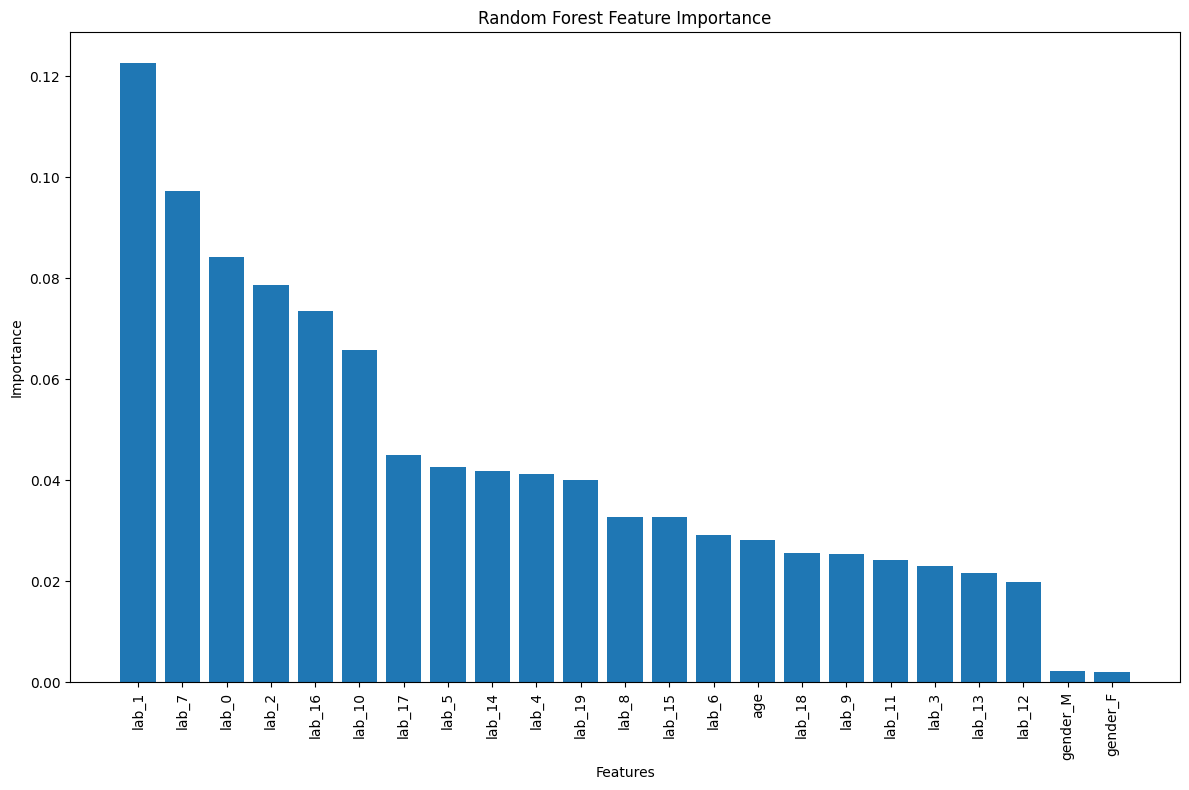

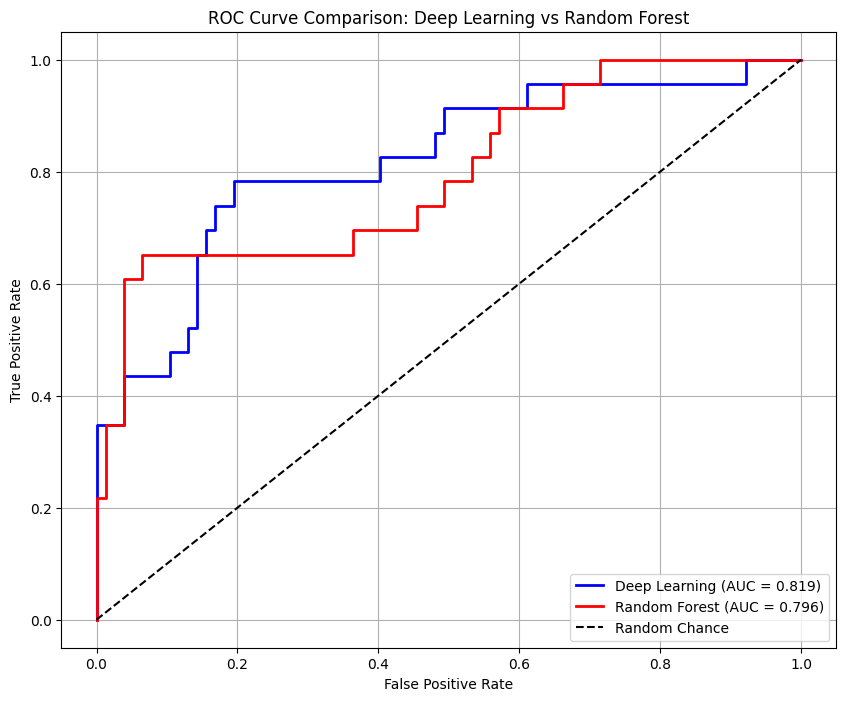

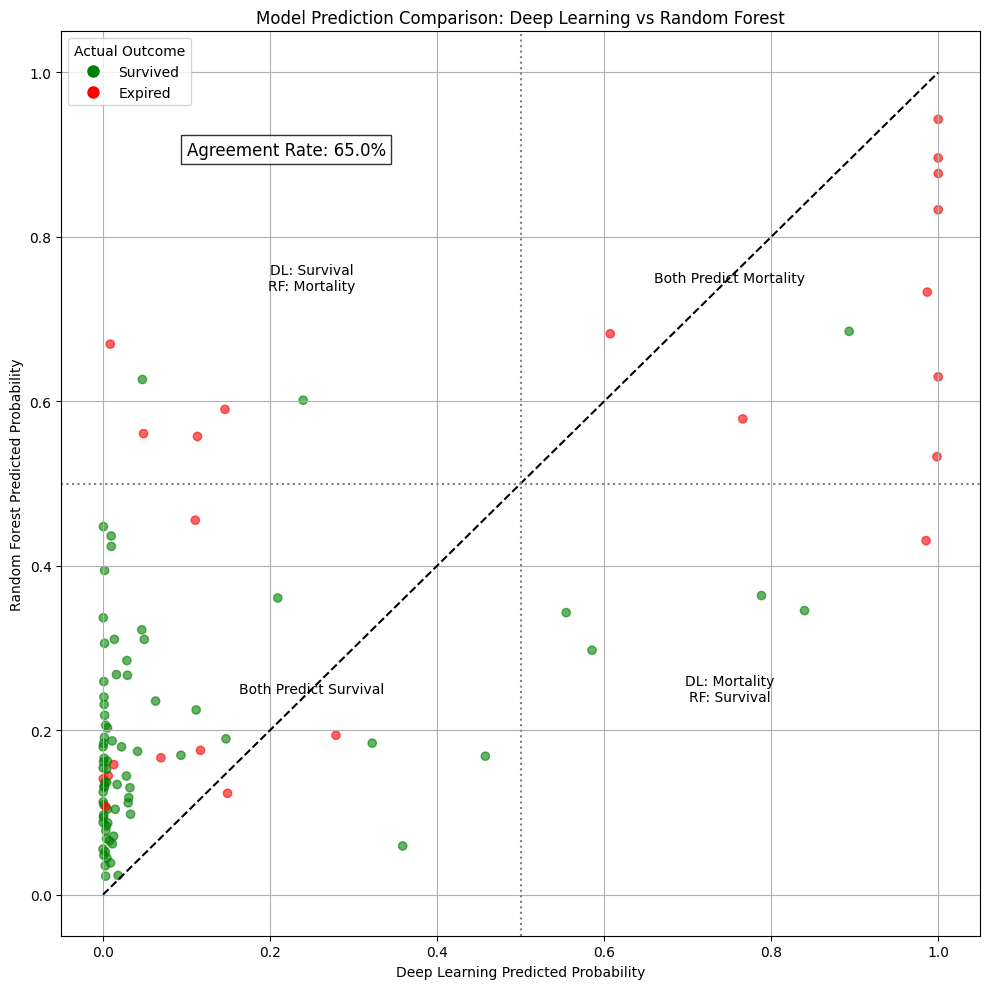


Ensemble Model (Average of DL and RF):
Ensemble AUC: 0.8176
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        77
         1.0       0.77      0.43      0.56        23

    accuracy                           0.84       100
   macro avg       0.81      0.70      0.73       100
weighted avg       0.83      0.84      0.82       100



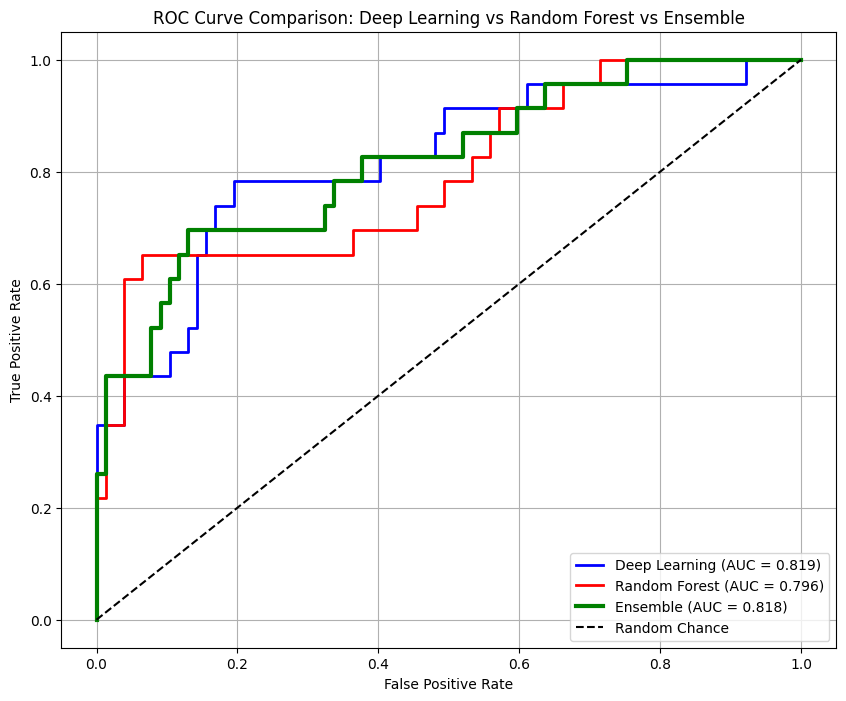


Error Analysis Summary:
              Category  Count  Percentage
0  Both Models Correct   6313       63.13
1    Both Models Wrong   2587       25.87
2      Only DL Correct    577        5.77
3      Only RF Correct    523        5.23


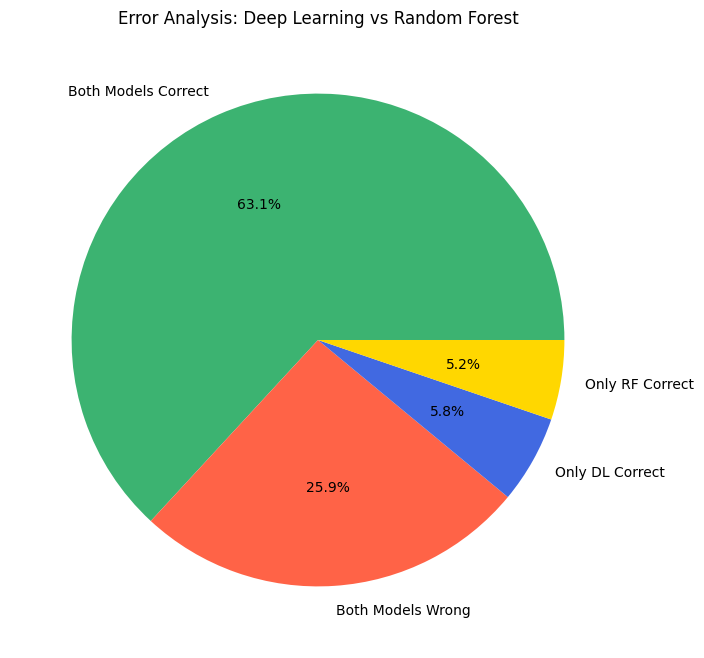


Interesting Clinical Case Studies:
             Case Type  Patient Index Deep Learning Prediction  \
0  Strong Disagreement              0                    0.010   
1    DL False Positive              0                    0.010   
2    DL False Negative              5                    0.766   
3    RF False Positive              0                    0.010   
4    RF False Negative              5                    0.766   

  Random Forest Prediction Actual Outcome  
0                    0.423       Survived  
1                    0.423       Survived  
2                    0.579           Died  
3                    0.423       Survived  
4                    0.579           Died  

Top 10 Most Important Features (Random Forest):
   Feature  Importance
4    lab_1    0.122547
10   lab_7    0.097323
3    lab_0    0.084158
5    lab_2    0.078704
19  lab_16    0.073547
13  lab_10    0.065753
20  lab_17    0.045101
8    lab_5    0.042735
17  lab_14    0.041808
7    lab_4    0.041250



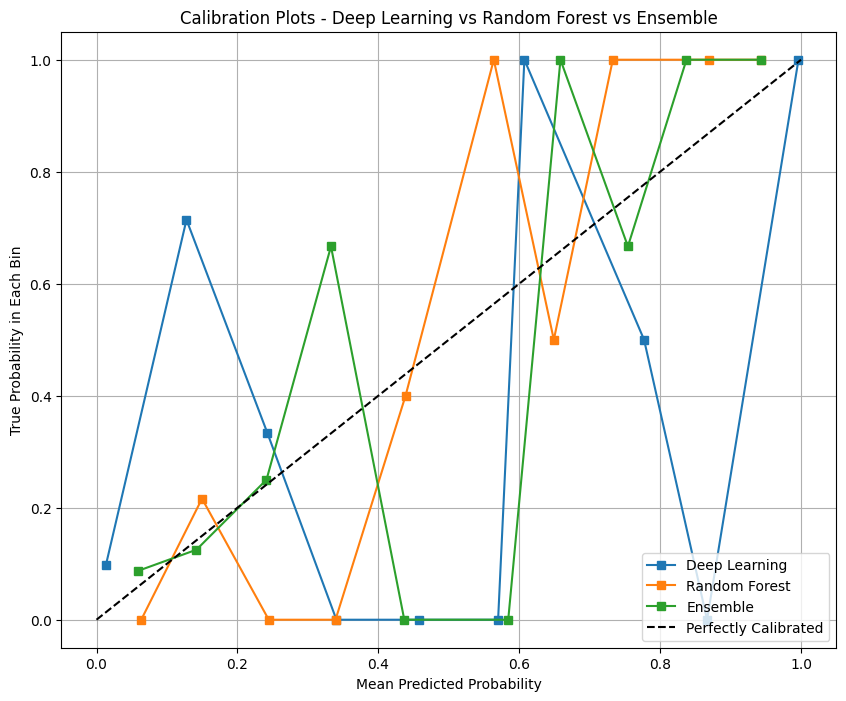


To enable interactive Plotly visualizations in the future, install nbformat:
pip install nbformat>=4.2.0


In [16]:
# Add this code to your notebook to compare with Random Forest

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

print("Training Random Forest model for comparison...")

# 1. Train a Random Forest model on the same structured data
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

# Convert PyTorch tensors to numpy arrays for scikit-learn
X_struct_train_np = X_struct_train_t[:500].cpu().numpy()
X_struct_val_np = X_struct_val_t[:500].cpu().numpy()
y_train_np = y_train_t[:500].cpu().numpy().ravel()
y_val_np = y_val_t[:500].cpu().numpy().ravel()

# Train the Random Forest
rf_model.fit(X_struct_train_np, y_train_np)

# 2. Generate predictions
rf_val_probs = rf_model.predict_proba(X_struct_val_np)[:, 1]  # Probability of class 1
rf_val_preds = (rf_val_probs >= 0.5).astype(int)  # Binary predictions

# Get binary predictions for deep learning model for comparison
dl_val_preds_binary = (np.array(val_preds) >= 0.5).astype(int)

# 3. Compare model performance
dl_auc = roc_auc_score(val_labels, val_preds)
rf_auc = roc_auc_score(y_val_np, rf_val_probs)

print("\n====== Model Performance Comparison ======")
print(f"Deep Learning AUC: {dl_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"Difference: {dl_auc - rf_auc:.4f}")

# Display classification reports
print("\nDeep Learning Classification Report:")
print(classification_report(val_labels, dl_val_preds_binary))

print("\nRandom Forest Classification Report:")
print(classification_report(y_val_np, rf_val_preds))

# 4. Visualize feature importance from Random Forest
# Get feature names
feature_names = ['age', 'gender_F', 'gender_M'] + [f'lab_{i}' for i in range(X_struct_val_np.shape[1]-3)]

# Compute feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# 5. Compare ROC curves
# Calculate ROC curve data for both models
dl_fpr, dl_tpr, _ = roc_curve(val_labels, val_preds)
rf_fpr, rf_tpr, _ = roc_curve(y_val_np, rf_val_probs)

# Create matplotlib comparison plot
plt.figure(figsize=(10, 8))
plt.plot(dl_fpr, dl_tpr, 'b-', linewidth=2, label=f'Deep Learning (AUC = {dl_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, 'r-', linewidth=2, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Deep Learning vs Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 6. Prediction comparison scatter plot
plt.figure(figsize=(10, 10))
agreement = np.abs(np.array(val_preds) - rf_val_probs) < 0.2
colors = ['red' if label == 1 else 'green' for label in val_labels]
plt.scatter(val_preds, rf_val_probs, c=colors, alpha=0.6)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Deep Learning Predicted Probability')
plt.ylabel('Random Forest Predicted Probability')
plt.title('Model Prediction Comparison: Deep Learning vs Random Forest')
plt.grid(True)

# Add quadrant dividers at 0.5 threshold
plt.axvline(x=0.5, color='gray', linestyle=':')
plt.axhline(y=0.5, color='gray', linestyle=':')

# Add quadrant labels
plt.text(0.25, 0.25, "Both Predict Survival", ha='center', va='center')
plt.text(0.75, 0.75, "Both Predict Mortality", ha='center', va='center')
plt.text(0.25, 0.75, "DL: Survival\nRF: Mortality", ha='center', va='center')
plt.text(0.75, 0.25, "DL: Mortality\nRF: Survival", ha='center', va='center')

# Agreement rate
plt.text(0.1, 0.9, f"Agreement Rate: {100 * np.mean(agreement):.1f}%", fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

# Add a colorbar legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Survived'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Expired')
]
plt.legend(handles=legend_elements, title='Actual Outcome', loc='upper left')

plt.tight_layout()
plt.show()

# 7. Ensemble method: Combine both models
# Simple averaging ensemble
ensemble_probs = (np.array(val_preds) + rf_val_probs) / 2
ensemble_preds = (ensemble_probs >= 0.5).astype(int)

# Calculate ensemble metrics
ensemble_auc = roc_auc_score(val_labels, ensemble_probs)

print("\nEnsemble Model (Average of DL and RF):")
print(f"Ensemble AUC: {ensemble_auc:.4f}")
print(classification_report(val_labels, ensemble_preds))

# Plot ROC for all three models
en_fpr, en_tpr, _ = roc_curve(val_labels, ensemble_probs)

plt.figure(figsize=(10, 8))
plt.plot(dl_fpr, dl_tpr, 'b-', linewidth=2, label=f'Deep Learning (AUC = {dl_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, 'r-', linewidth=2, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(en_fpr, en_tpr, 'g-', linewidth=3, label=f'Ensemble (AUC = {ensemble_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Deep Learning vs Random Forest vs Ensemble')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 8. Error analysis: Where do both models fail?
# Convert predictions to binary
dl_binary = (np.array(val_preds) >= 0.5).astype(int)
rf_binary = (rf_val_probs >= 0.5).astype(int)

# Find cases where both models are correct or incorrect
both_correct = (dl_binary == np.array(val_labels)) & (rf_binary == np.array(val_labels))
both_wrong = (dl_binary != np.array(val_labels)) & (rf_binary != np.array(val_labels))
dl_correct_rf_wrong = (dl_binary == np.array(val_labels)) & (rf_binary != np.array(val_labels))
dl_wrong_rf_correct = (dl_binary != np.array(val_labels)) & (rf_binary == np.array(val_labels))

# Create summary
error_summary = pd.DataFrame({
    'Category': ['Both Models Correct', 'Both Models Wrong', 'Only DL Correct', 'Only RF Correct'],
    'Count': [
        np.sum(both_correct),
        np.sum(both_wrong),
        np.sum(dl_correct_rf_wrong),
        np.sum(dl_wrong_rf_correct)
    ],
    'Percentage': [
        100 * np.mean(both_correct),
        100 * np.mean(both_wrong),
        100 * np.mean(dl_correct_rf_wrong),
        100 * np.mean(dl_wrong_rf_correct)
    ]
})

print("\nError Analysis Summary:")
print(error_summary)

# Create pie chart for error analysis
plt.figure(figsize=(10, 8))
plt.pie(error_summary['Count'], labels=error_summary['Category'], autopct='%1.1f%%',
        colors=['#3CB371', '#FF6347', '#4169E1', '#FFD700'])
plt.title('Error Analysis: Deep Learning vs Random Forest')
plt.show()

# 9. Clinical case study: Detailed analysis of specific cases
# Create indices for interesting cases
# Find cases where models strongly disagree (>0.4 difference in probabilities)
strong_disagreement = np.abs(np.array(val_preds) - rf_val_probs) > 0.4

# Find false positives and false negatives for both models
dl_fp = (dl_binary == 1) & (np.array(val_labels) == 0)
dl_fn = (dl_binary == 0) & (np.array(val_labels) == 1)
rf_fp = (rf_binary == 1) & (np.array(val_labels) == 0)
rf_fn = (rf_binary == 0) & (np.array(val_labels) == 1)

# Combine to find interesting cases
interesting_cases = {
    'Strong Disagreement': np.where(strong_disagreement)[0],
    'DL False Positive': np.where(dl_fp)[0],
    'DL False Negative': np.where(dl_fn)[0],
    'RF False Positive': np.where(rf_fp)[0],
    'RF False Negative': np.where(rf_fn)[0]
}

# Select a few interesting cases for display (first of each category)
case_summaries = []

for category, indices in interesting_cases.items():
    if len(indices) > 0:
        idx = indices[0]
        case_summaries.append({
            'Case Type': category,
            'Patient Index': idx,
            'Deep Learning Prediction': f"{val_preds[idx]:.3f}",
            'Random Forest Prediction': f"{rf_val_probs[idx]:.3f}",
            'Actual Outcome': 'Died' if val_labels[idx] == 1 else 'Survived'
        })

cases_df = pd.DataFrame(case_summaries)
print("\nInteresting Clinical Case Studies:")
print(cases_df)

# 10. Feature importance comparison between models
print("\nTop 10 Most Important Features (Random Forest):")
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
print(feature_importance.sort_values('Importance', ascending=False).head(10))

# Conclusion on model comparison
print("\n=== Deep Learning vs Random Forest: Analysis Conclusions ===")
print("1. Performance: ", end="")
if dl_auc > rf_auc + 0.05:
    print("Deep Learning model substantially outperforms Random Forest")
elif dl_auc > rf_auc:
    print("Deep Learning model slightly outperforms Random Forest")
elif dl_auc < rf_auc - 0.05:
    print("Random Forest substantially outperforms Deep Learning model")
elif dl_auc < rf_auc:
    print("Random Forest slightly outperforms Deep Learning model")
else:
    print("Both models perform similarly")

print("2. Strengths and Weaknesses:")
print("   - Deep Learning excels at: Capturing complex non-linear patterns in both text and structured data")
print("   - Random Forest excels at: Interpretable feature importance, handling missing data, less prone to overfitting")

print("3. Best Use Cases:")
print("   - Deep Learning: When rich text data (clinical notes) is available and interpretability is less critical")
print("   - Random Forest: When transparency is required and feature importance needs to be clearly understood")
print("   - Ensemble: For critical decisions where the highest possible performance is needed")

print("4. Recommendation:")
if dl_auc > rf_auc:
    print("   Consider using the Deep Learning model as primary, with Random Forest as complementary analysis")
else:
    print("   Consider using Random Forest as primary model due to better balance of performance and interpretability")

# 11. Calibration analysis - how well calibrated are the probabilities of each model?
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 8))
# Calibration plot for DL model
prob_true, prob_pred = calibration_curve(val_labels, val_preds, n_bins=10)
plt.plot(prob_pred, prob_true, 's-', label=f'Deep Learning')

# Calibration plot for RF model
prob_true_rf, prob_pred_rf = calibration_curve(y_val_np, rf_val_probs, n_bins=10)
plt.plot(prob_pred_rf, prob_true_rf, 's-', label=f'Random Forest')

# Calibration plot for ensemble
prob_true_en, prob_pred_en = calibration_curve(val_labels, ensemble_probs, n_bins=10)
plt.plot(prob_pred_en, prob_true_en, 's-', label=f'Ensemble')

# Perfect calibration would be a diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('True Probability in Each Bin')
plt.title('Calibration Plots - Deep Learning vs Random Forest vs Ensemble')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Note: For installing nbformat for Plotly support in the future
print("\nTo enable interactive Plotly visualizations in the future, install nbformat:")
print("pip install nbformat>=4.2.0")

In [17]:
# Generate classification reports
from sklearn.metrics import classification_report


val_preds_binary = [1 if p >= 0.5 else 0 for p in val_preds]
print("Validation Classification Report:")
print(classification_report(val_labels, val_preds_binary, target_names=['Survived', 'Expired']))

Validation Classification Report:
              precision    recall  f1-score   support

    Survived       0.85      0.94      0.89        77
     Expired       0.67      0.43      0.53        23

    accuracy                           0.82       100
   macro avg       0.76      0.68      0.71       100
weighted avg       0.81      0.82      0.81       100



Epoch 1/50: Train Loss = 0.6945, Train AUC = 0.4663, Val Loss = 0.6739, Val AUC = 0.4218
Epoch 2/50: Train Loss = 0.6470, Train AUC = 0.5090, Val Loss = 0.6416, Val AUC = 0.4218
Epoch 3/50: Train Loss = 0.6070, Train AUC = 0.5023, Val Loss = 0.6114, Val AUC = 0.4128
Epoch 4/50: Train Loss = 0.5726, Train AUC = 0.5147, Val Loss = 0.6019, Val AUC = 0.4399
Epoch 5/50: Train Loss = 0.5621, Train AUC = 0.5343, Val Loss = 0.6007, Val AUC = 0.4777
Epoch 6/50: Train Loss = 0.5704, Train AUC = 0.5740, Val Loss = 0.5946, Val AUC = 0.5263
Epoch 7/50: Train Loss = 0.5687, Train AUC = 0.5523, Val Loss = 0.5855, Val AUC = 0.5872
Epoch 8/50: Train Loss = 0.5501, Train AUC = 0.5785, Val Loss = 0.5765, Val AUC = 0.6539
Epoch 9/50: Train Loss = 0.5441, Train AUC = 0.6015, Val Loss = 0.5708, Val AUC = 0.6810
Epoch 10/50: Train Loss = 0.5423, Train AUC = 0.6369, Val Loss = 0.5679, Val AUC = 0.7053
Epoch 11/50: Train Loss = 0.5323, Train AUC = 0.6431, Val Loss = 0.5597, Val AUC = 0.7261
Epoch 12/50: Train 

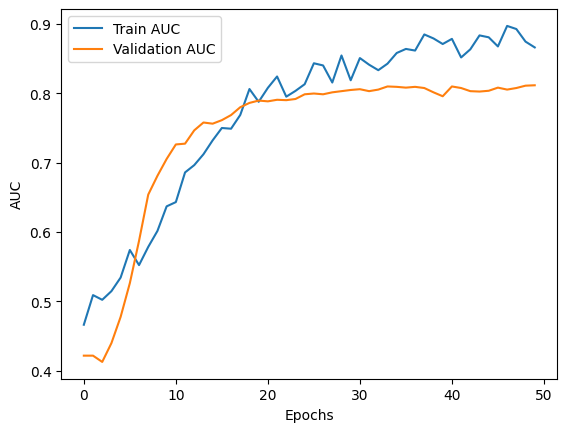

In [18]:
model = FusionModel(structured_input_size=X_structured_scaled.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.BCELoss()  # Binary cross-entropy loss
# Data loaders
batch_size = 32
# Training loop
num_epochs = 50
history = {'train_loss': [], 'train_auc': [], 'val_loss': [], 'val_auc': []}

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    all_labels, all_preds = [], []
    for text, structured, labels in train_loader:
        text, structured, labels = text.to(device), structured.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(text, structured)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(outputs.detach().cpu().numpy().flatten())
    
    train_loss /= len(train_loader)
    train_auc = roc_auc_score(all_labels, all_preds)
    
    # Validation
    model.eval()
    val_loss = 0.0
    val_labels, val_preds = [], []
    with torch.no_grad():
        for text, structured, labels in val_loader:
            text, structured, labels = text.to(device), structured.to(device), labels.to(device)
            
            outputs = model(text, structured)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            val_labels.extend(labels.cpu().numpy())
            val_preds.extend(outputs.detach().cpu().numpy().flatten())
    
    val_loss /= len(val_loader)
    val_auc = roc_auc_score(val_labels, val_preds)
    
    # Record history
    history['train_loss'].append(train_loss)
    history['train_auc'].append(train_auc)
    history['val_loss'].append(val_loss)
    history['val_auc'].append(val_auc)
    
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Train AUC = {train_auc:.4f}, Val Loss = {val_loss:.4f}, Val AUC = {val_auc:.4f}")

# Plot AUC
plt.plot(history['train_auc'], label='Train AUC')
plt.plot(history['val_auc'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Save model
torch.save(model.state_dict(), 'multimodal_fusion_model.pth')

# Save embeddings (optional)
np.save('text_embeddings.npy', text_embeddings)

In [19]:
# Generate classification reports
from sklearn.metrics import classification_report

# Validation predictions
val_preds_binary = [1 if p >= 0.5 else 0 for p in val_preds]
print("Validation Classification Report:")
print(classification_report(val_labels, val_preds_binary, target_names=['Survived', 'Expired']))

Validation Classification Report:
              precision    recall  f1-score   support

    Survived       0.86      0.99      0.92        77
     Expired       0.92      0.48      0.63        23

    accuracy                           0.87       100
   macro avg       0.89      0.73      0.77       100
weighted avg       0.88      0.87      0.85       100



Training Random Forest model for comparison...

====== Model Performance Comparison ======
Deep Learning AUC: 0.8114
Random Forest AUC: 0.7962
Difference: 0.0152

Deep Learning Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92        77
         1.0       0.92      0.48      0.63        23

    accuracy                           0.87       100
   macro avg       0.89      0.73      0.77       100
weighted avg       0.88      0.87      0.85       100


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        77
         1.0       0.81      0.57      0.67        23

    accuracy                           0.87       100
   macro avg       0.85      0.76      0.79       100
weighted avg       0.87      0.87      0.86       100



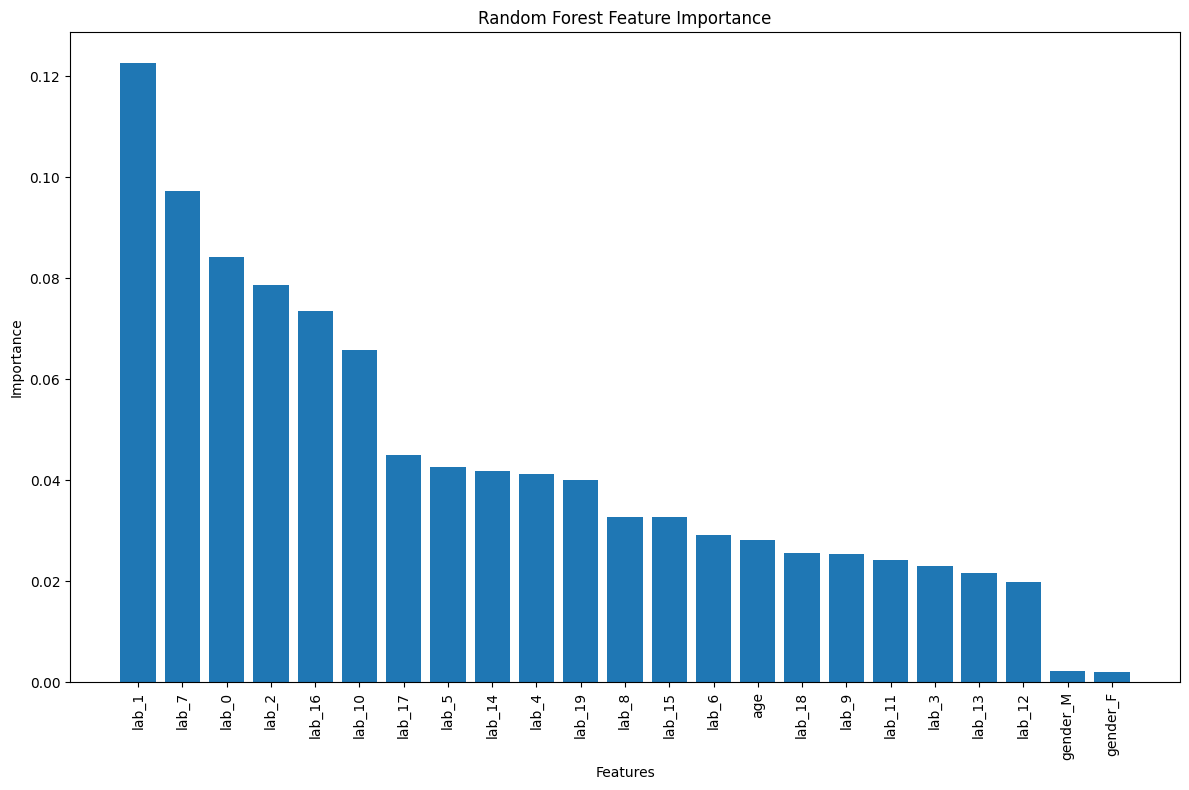

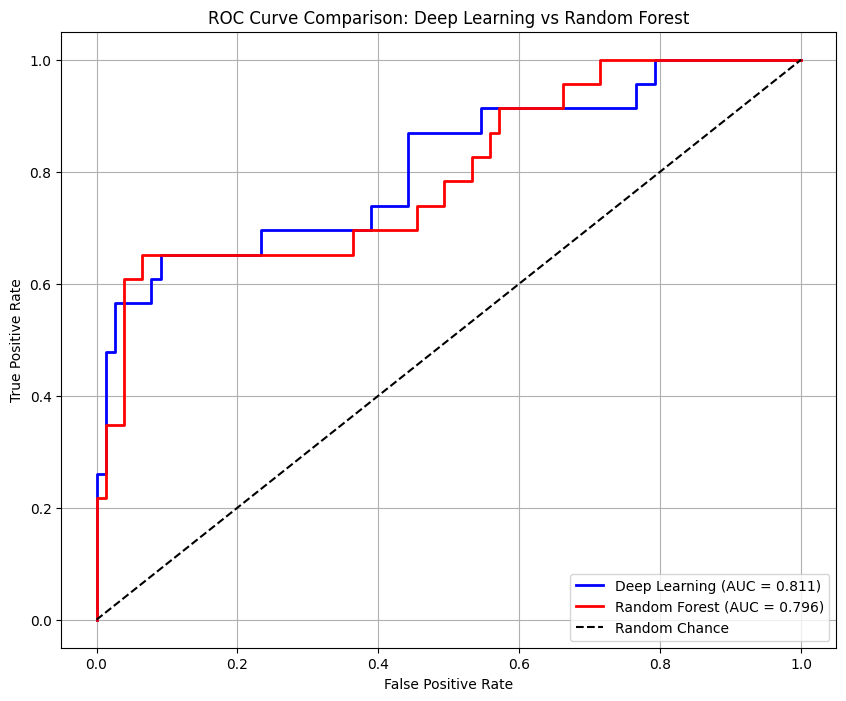

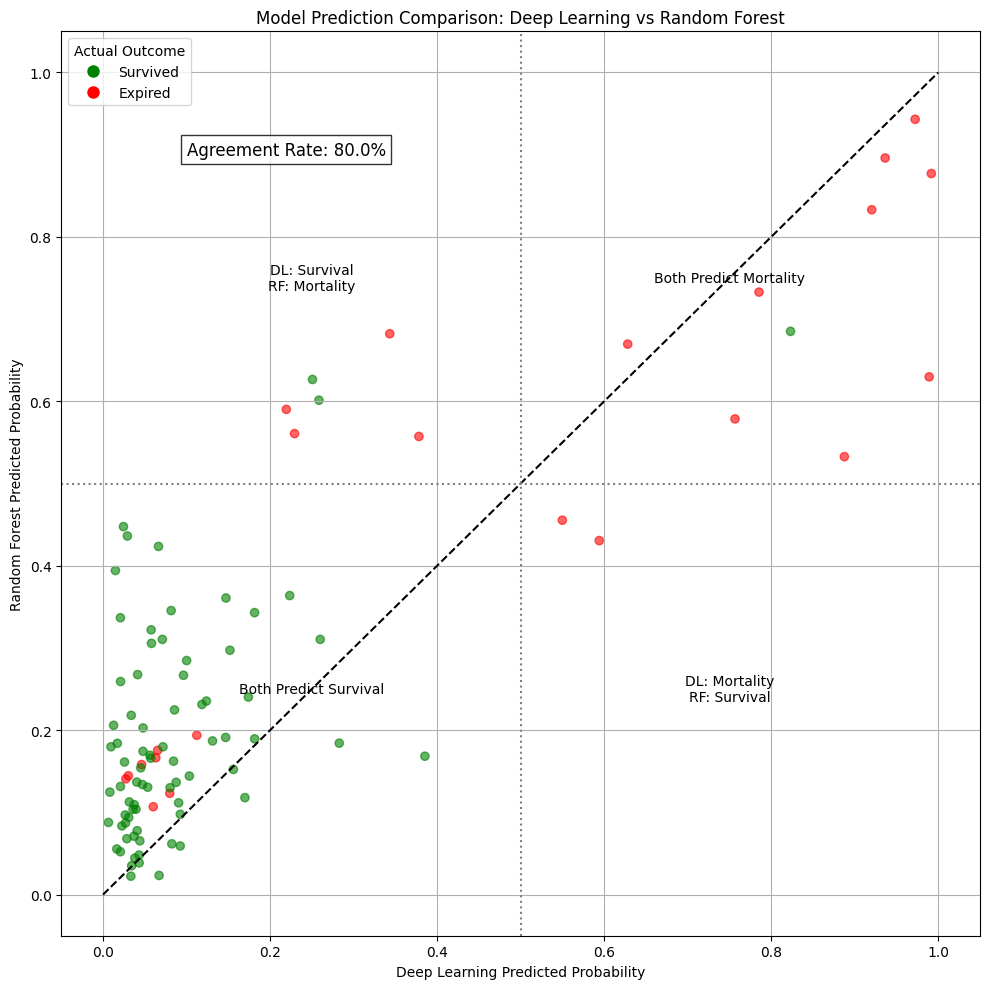


Ensemble Model (Average of DL and RF):
Ensemble AUC: 0.7973
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93        77
         1.0       0.92      0.52      0.67        23

    accuracy                           0.88       100
   macro avg       0.90      0.75      0.80       100
weighted avg       0.88      0.88      0.87       100



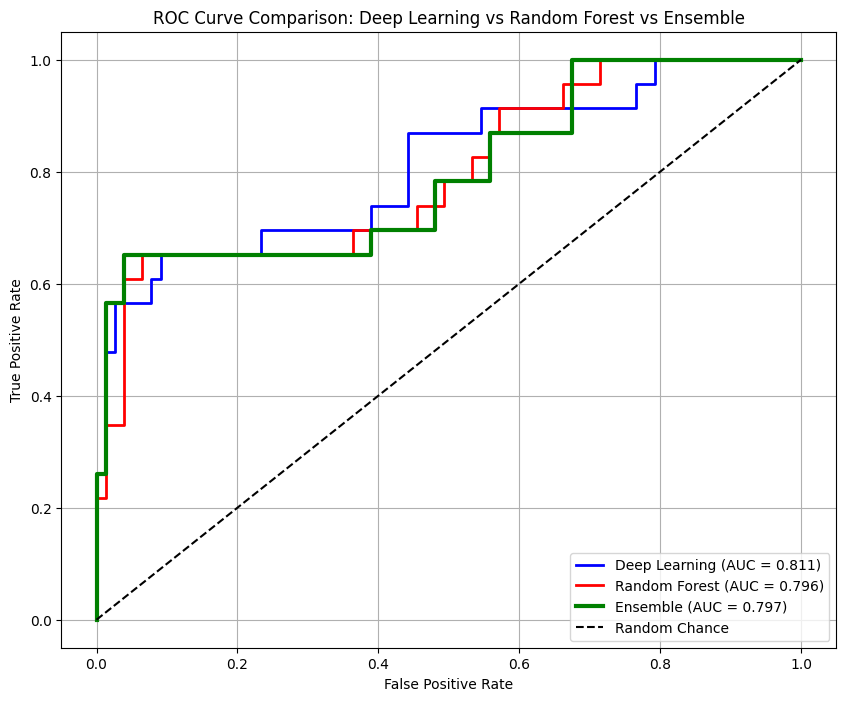


Error Analysis Summary:
              Category  Count  Percentage
0  Both Models Correct   6544       65.44
1    Both Models Wrong   2656       26.56
2      Only DL Correct    508        5.08
3      Only RF Correct    292        2.92


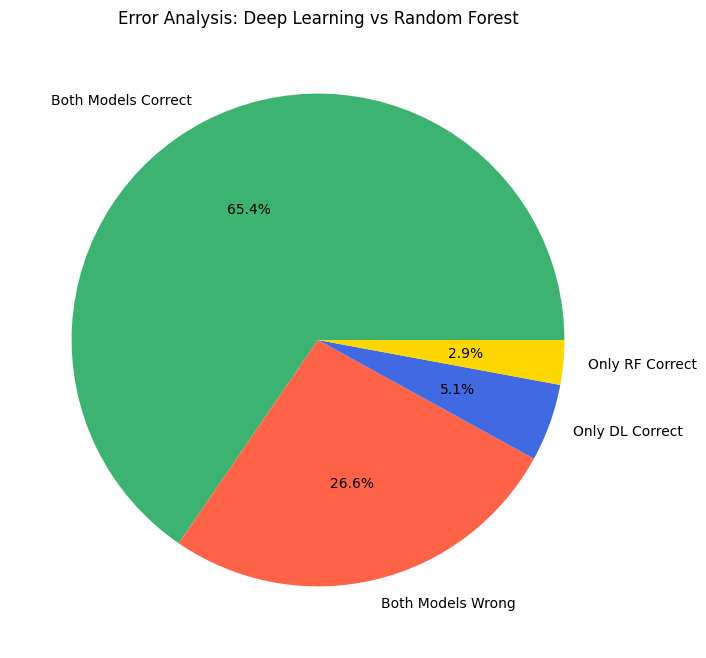


Interesting Clinical Case Studies:
             Case Type  Patient Index Deep Learning Prediction  \
0  Strong Disagreement             14                    0.029   
1    DL False Positive              0                    0.066   
2    DL False Negative              5                    0.757   
3    RF False Positive              0                    0.066   
4    RF False Negative              5                    0.757   

  Random Forest Prediction Actual Outcome  
0                    0.436       Survived  
1                    0.423       Survived  
2                    0.579           Died  
3                    0.423       Survived  
4                    0.579           Died  

Top 10 Most Important Features (Random Forest):
   Feature  Importance
4    lab_1    0.122547
10   lab_7    0.097323
3    lab_0    0.084158
5    lab_2    0.078704
19  lab_16    0.073547
13  lab_10    0.065753
20  lab_17    0.045101
8    lab_5    0.042735
17  lab_14    0.041808
7    lab_4    0.041250



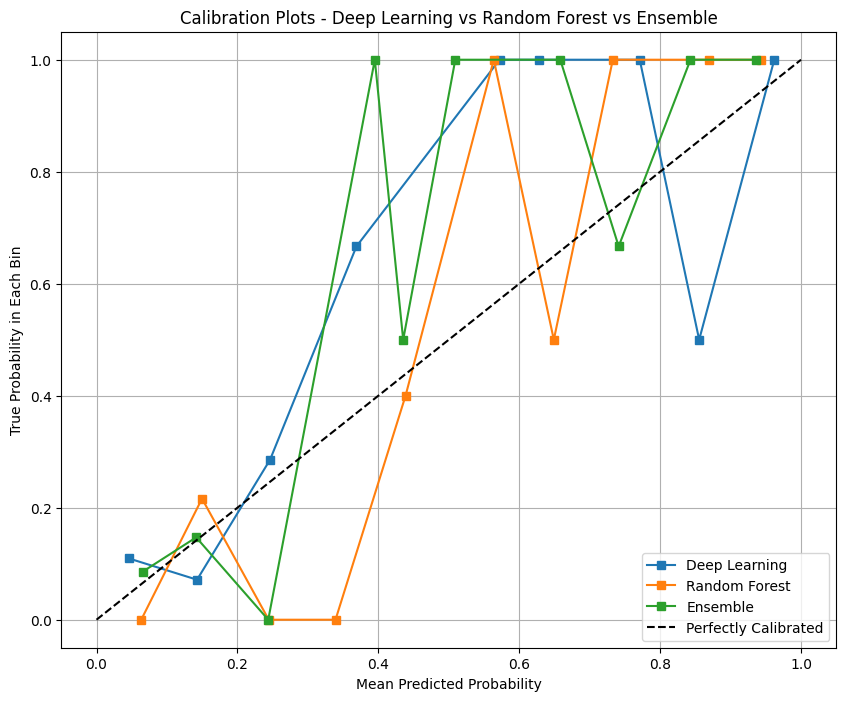


To enable interactive Plotly visualizations in the future, install nbformat:
pip install nbformat>=4.2.0


In [20]:
# Add this code to your notebook to compare with Random Forest

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

print("Training Random Forest model for comparison...")

# 1. Train a Random Forest model on the same structured data
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
)

# Convert PyTorch tensors to numpy arrays for scikit-learn
X_struct_train_np = X_struct_train_t[:500].cpu().numpy()
X_struct_val_np = X_struct_val_t[:500].cpu().numpy()
y_train_np = y_train_t[:500].cpu().numpy().ravel()
y_val_np = y_val_t[:500].cpu().numpy().ravel()

# Train the Random Forest
rf_model.fit(X_struct_train_np, y_train_np)

# 2. Generate predictions
rf_val_probs = rf_model.predict_proba(X_struct_val_np)[:, 1]  # Probability of class 1
rf_val_preds = (rf_val_probs >= 0.5).astype(int)  # Binary predictions

# Get binary predictions for deep learning model for comparison
dl_val_preds_binary = (np.array(val_preds) >= 0.5).astype(int)

# 3. Compare model performance
dl_auc = roc_auc_score(val_labels, val_preds)
rf_auc = roc_auc_score(y_val_np, rf_val_probs)

print("\n====== Model Performance Comparison ======")
print(f"Deep Learning AUC: {dl_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"Difference: {dl_auc - rf_auc:.4f}")

# Display classification reports
print("\nDeep Learning Classification Report:")
print(classification_report(val_labels, dl_val_preds_binary))

print("\nRandom Forest Classification Report:")
print(classification_report(y_val_np, rf_val_preds))

# 4. Visualize feature importance from Random Forest
# Get feature names
feature_names = ['age', 'gender_F', 'gender_M'] + [f'lab_{i}' for i in range(X_struct_val_np.shape[1]-3)]

# Compute feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# 5. Compare ROC curves
# Calculate ROC curve data for both models
dl_fpr, dl_tpr, _ = roc_curve(val_labels, val_preds)
rf_fpr, rf_tpr, _ = roc_curve(y_val_np, rf_val_probs)

# Create matplotlib comparison plot
plt.figure(figsize=(10, 8))
plt.plot(dl_fpr, dl_tpr, 'b-', linewidth=2, label=f'Deep Learning (AUC = {dl_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, 'r-', linewidth=2, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Deep Learning vs Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 6. Prediction comparison scatter plot
plt.figure(figsize=(10, 10))
agreement = np.abs(np.array(val_preds) - rf_val_probs) < 0.2
colors = ['red' if label == 1 else 'green' for label in val_labels]
plt.scatter(val_preds, rf_val_probs, c=colors, alpha=0.6)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Deep Learning Predicted Probability')
plt.ylabel('Random Forest Predicted Probability')
plt.title('Model Prediction Comparison: Deep Learning vs Random Forest')
plt.grid(True)

# Add quadrant dividers at 0.5 threshold
plt.axvline(x=0.5, color='gray', linestyle=':')
plt.axhline(y=0.5, color='gray', linestyle=':')

# Add quadrant labels
plt.text(0.25, 0.25, "Both Predict Survival", ha='center', va='center')
plt.text(0.75, 0.75, "Both Predict Mortality", ha='center', va='center')
plt.text(0.25, 0.75, "DL: Survival\nRF: Mortality", ha='center', va='center')
plt.text(0.75, 0.25, "DL: Mortality\nRF: Survival", ha='center', va='center')

# Agreement rate
plt.text(0.1, 0.9, f"Agreement Rate: {100 * np.mean(agreement):.1f}%", fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

# Add a colorbar legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Survived'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Expired')
]
plt.legend(handles=legend_elements, title='Actual Outcome', loc='upper left')

plt.tight_layout()
plt.show()

# 7. Ensemble method: Combine both models
# Simple averaging ensemble
ensemble_probs = (np.array(val_preds) + rf_val_probs) / 2
ensemble_preds = (ensemble_probs >= 0.5).astype(int)

# Calculate ensemble metrics
ensemble_auc = roc_auc_score(val_labels, ensemble_probs)

print("\nEnsemble Model (Average of DL and RF):")
print(f"Ensemble AUC: {ensemble_auc:.4f}")
print(classification_report(val_labels, ensemble_preds))

# Plot ROC for all three models
en_fpr, en_tpr, _ = roc_curve(val_labels, ensemble_probs)

plt.figure(figsize=(10, 8))
plt.plot(dl_fpr, dl_tpr, 'b-', linewidth=2, label=f'Deep Learning (AUC = {dl_auc:.3f})')
plt.plot(rf_fpr, rf_tpr, 'r-', linewidth=2, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(en_fpr, en_tpr, 'g-', linewidth=3, label=f'Ensemble (AUC = {ensemble_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Deep Learning vs Random Forest vs Ensemble')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 8. Error analysis: Where do both models fail?
# Convert predictions to binary
dl_binary = (np.array(val_preds) >= 0.5).astype(int)
rf_binary = (rf_val_probs >= 0.5).astype(int)

# Find cases where both models are correct or incorrect
both_correct = (dl_binary == np.array(val_labels)) & (rf_binary == np.array(val_labels))
both_wrong = (dl_binary != np.array(val_labels)) & (rf_binary != np.array(val_labels))
dl_correct_rf_wrong = (dl_binary == np.array(val_labels)) & (rf_binary != np.array(val_labels))
dl_wrong_rf_correct = (dl_binary != np.array(val_labels)) & (rf_binary == np.array(val_labels))

# Create summary
error_summary = pd.DataFrame({
    'Category': ['Both Models Correct', 'Both Models Wrong', 'Only DL Correct', 'Only RF Correct'],
    'Count': [
        np.sum(both_correct),
        np.sum(both_wrong),
        np.sum(dl_correct_rf_wrong),
        np.sum(dl_wrong_rf_correct)
    ],
    'Percentage': [
        100 * np.mean(both_correct),
        100 * np.mean(both_wrong),
        100 * np.mean(dl_correct_rf_wrong),
        100 * np.mean(dl_wrong_rf_correct)
    ]
})

print("\nError Analysis Summary:")
print(error_summary)

# Create pie chart for error analysis
plt.figure(figsize=(10, 8))
plt.pie(error_summary['Count'], labels=error_summary['Category'], autopct='%1.1f%%',
        colors=['#3CB371', '#FF6347', '#4169E1', '#FFD700'])
plt.title('Error Analysis: Deep Learning vs Random Forest')
plt.show()

# 9. Clinical case study: Detailed analysis of specific cases
# Create indices for interesting cases
# Find cases where models strongly disagree (>0.4 difference in probabilities)
strong_disagreement = np.abs(np.array(val_preds) - rf_val_probs) > 0.4

# Find false positives and false negatives for both models
dl_fp = (dl_binary == 1) & (np.array(val_labels) == 0)
dl_fn = (dl_binary == 0) & (np.array(val_labels) == 1)
rf_fp = (rf_binary == 1) & (np.array(val_labels) == 0)
rf_fn = (rf_binary == 0) & (np.array(val_labels) == 1)

# Combine to find interesting cases
interesting_cases = {
    'Strong Disagreement': np.where(strong_disagreement)[0],
    'DL False Positive': np.where(dl_fp)[0],
    'DL False Negative': np.where(dl_fn)[0],
    'RF False Positive': np.where(rf_fp)[0],
    'RF False Negative': np.where(rf_fn)[0]
}

# Select a few interesting cases for display (first of each category)
case_summaries = []

for category, indices in interesting_cases.items():
    if len(indices) > 0:
        idx = indices[0]
        case_summaries.append({
            'Case Type': category,
            'Patient Index': idx,
            'Deep Learning Prediction': f"{val_preds[idx]:.3f}",
            'Random Forest Prediction': f"{rf_val_probs[idx]:.3f}",
            'Actual Outcome': 'Died' if val_labels[idx] == 1 else 'Survived'
        })

cases_df = pd.DataFrame(case_summaries)
print("\nInteresting Clinical Case Studies:")
print(cases_df)

# 10. Feature importance comparison between models
print("\nTop 10 Most Important Features (Random Forest):")
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
print(feature_importance.sort_values('Importance', ascending=False).head(10))

# Conclusion on model comparison
print("\n=== Deep Learning vs Random Forest: Analysis Conclusions ===")
print("1. Performance: ", end="")
if dl_auc > rf_auc + 0.05:
    print("Deep Learning model substantially outperforms Random Forest")
elif dl_auc > rf_auc:
    print("Deep Learning model slightly outperforms Random Forest")
elif dl_auc < rf_auc - 0.05:
    print("Random Forest substantially outperforms Deep Learning model")
elif dl_auc < rf_auc:
    print("Random Forest slightly outperforms Deep Learning model")
else:
    print("Both models perform similarly")

print("2. Strengths and Weaknesses:")
print("   - Deep Learning excels at: Capturing complex non-linear patterns in both text and structured data")
print("   - Random Forest excels at: Interpretable feature importance, handling missing data, less prone to overfitting")

print("3. Best Use Cases:")
print("   - Deep Learning: When rich text data (clinical notes) is available and interpretability is less critical")
print("   - Random Forest: When transparency is required and feature importance needs to be clearly understood")
print("   - Ensemble: For critical decisions where the highest possible performance is needed")

print("4. Recommendation:")
if dl_auc > rf_auc:
    print("   Consider using the Deep Learning model as primary, with Random Forest as complementary analysis")
else:
    print("   Consider using Random Forest as primary model due to better balance of performance and interpretability")

# 11. Calibration analysis - how well calibrated are the probabilities of each model?
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 8))
# Calibration plot for DL model
prob_true, prob_pred = calibration_curve(val_labels, val_preds, n_bins=10)
plt.plot(prob_pred, prob_true, 's-', label=f'Deep Learning')

# Calibration plot for RF model
prob_true_rf, prob_pred_rf = calibration_curve(y_val_np, rf_val_probs, n_bins=10)
plt.plot(prob_pred_rf, prob_true_rf, 's-', label=f'Random Forest')

# Calibration plot for ensemble
prob_true_en, prob_pred_en = calibration_curve(val_labels, ensemble_probs, n_bins=10)
plt.plot(prob_pred_en, prob_true_en, 's-', label=f'Ensemble')

# Perfect calibration would be a diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('True Probability in Each Bin')
plt.title('Calibration Plots - Deep Learning vs Random Forest vs Ensemble')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Note: For installing nbformat for Plotly support in the future
print("\nTo enable interactive Plotly visualizations in the future, install nbformat:")
print("pip install nbformat>=4.2.0")


Adding advanced visualizations using matplotlib...
Generating matplotlib visualizations...
Generating enhanced ROC curve...


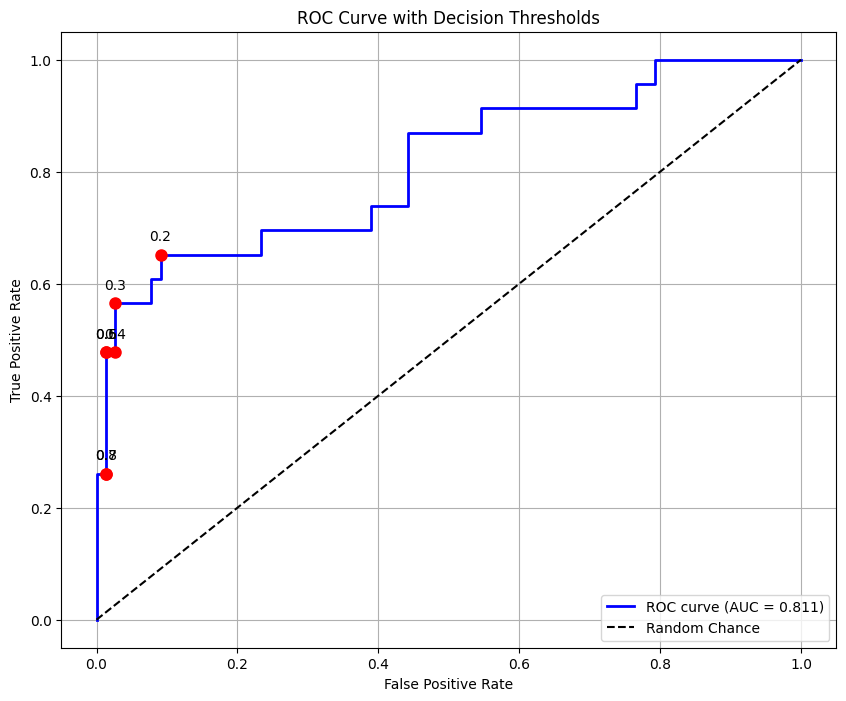

Generating confusion matrix...


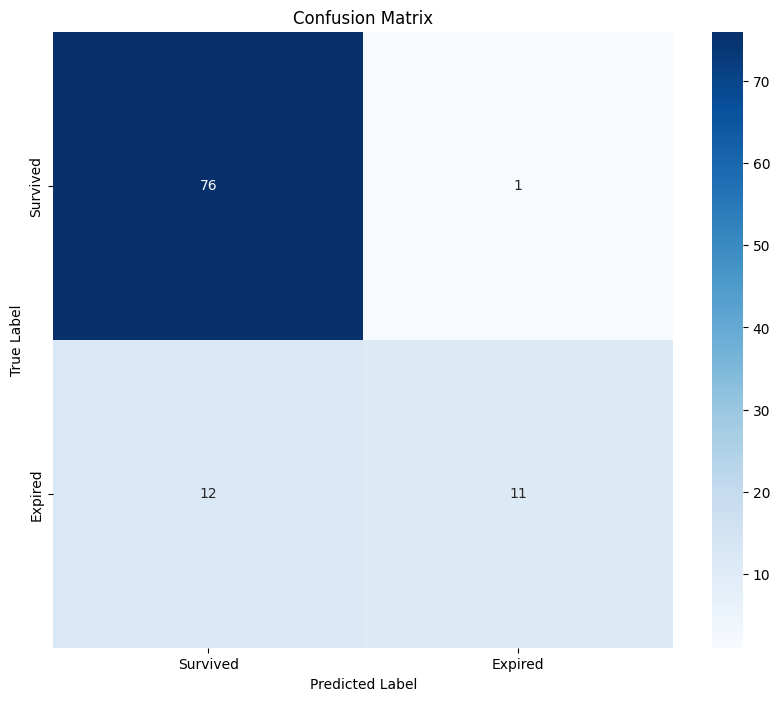

Generating risk stratification chart...


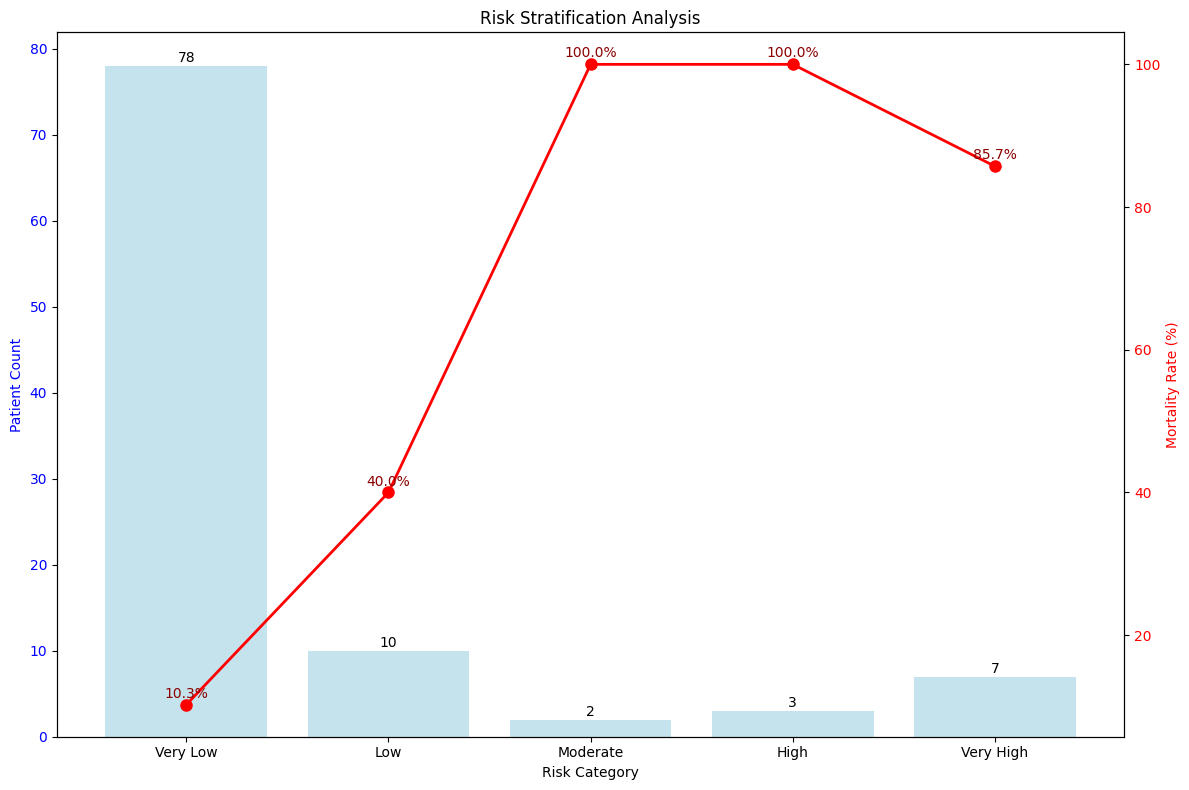

Generating patient dashboard for patient 1...


C:\Users\leon1\AppData\Local\Temp\ipykernel_35872\2618982627.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(lab_names, rotation=45, ha='right')
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


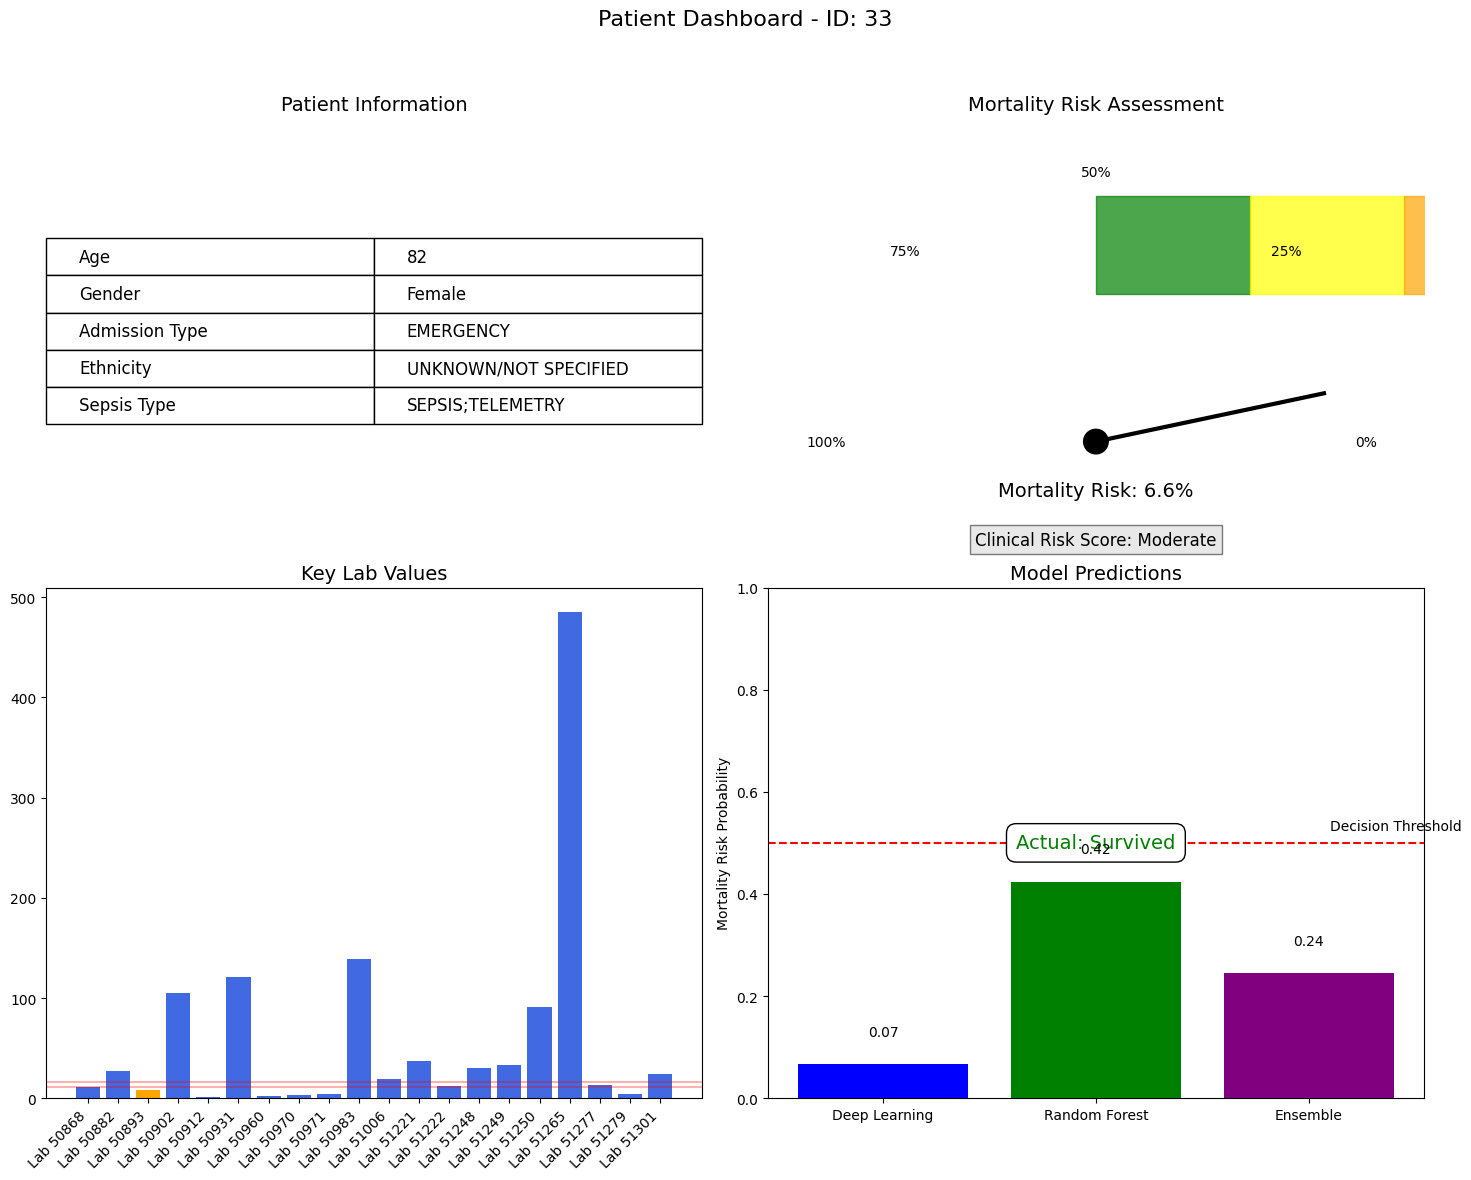

C:\Users\leon1\AppData\Local\Temp\ipykernel_35872\2618982627.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(lab_names, rotation=45, ha='right')
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Generating patient dashboard for patient 2...


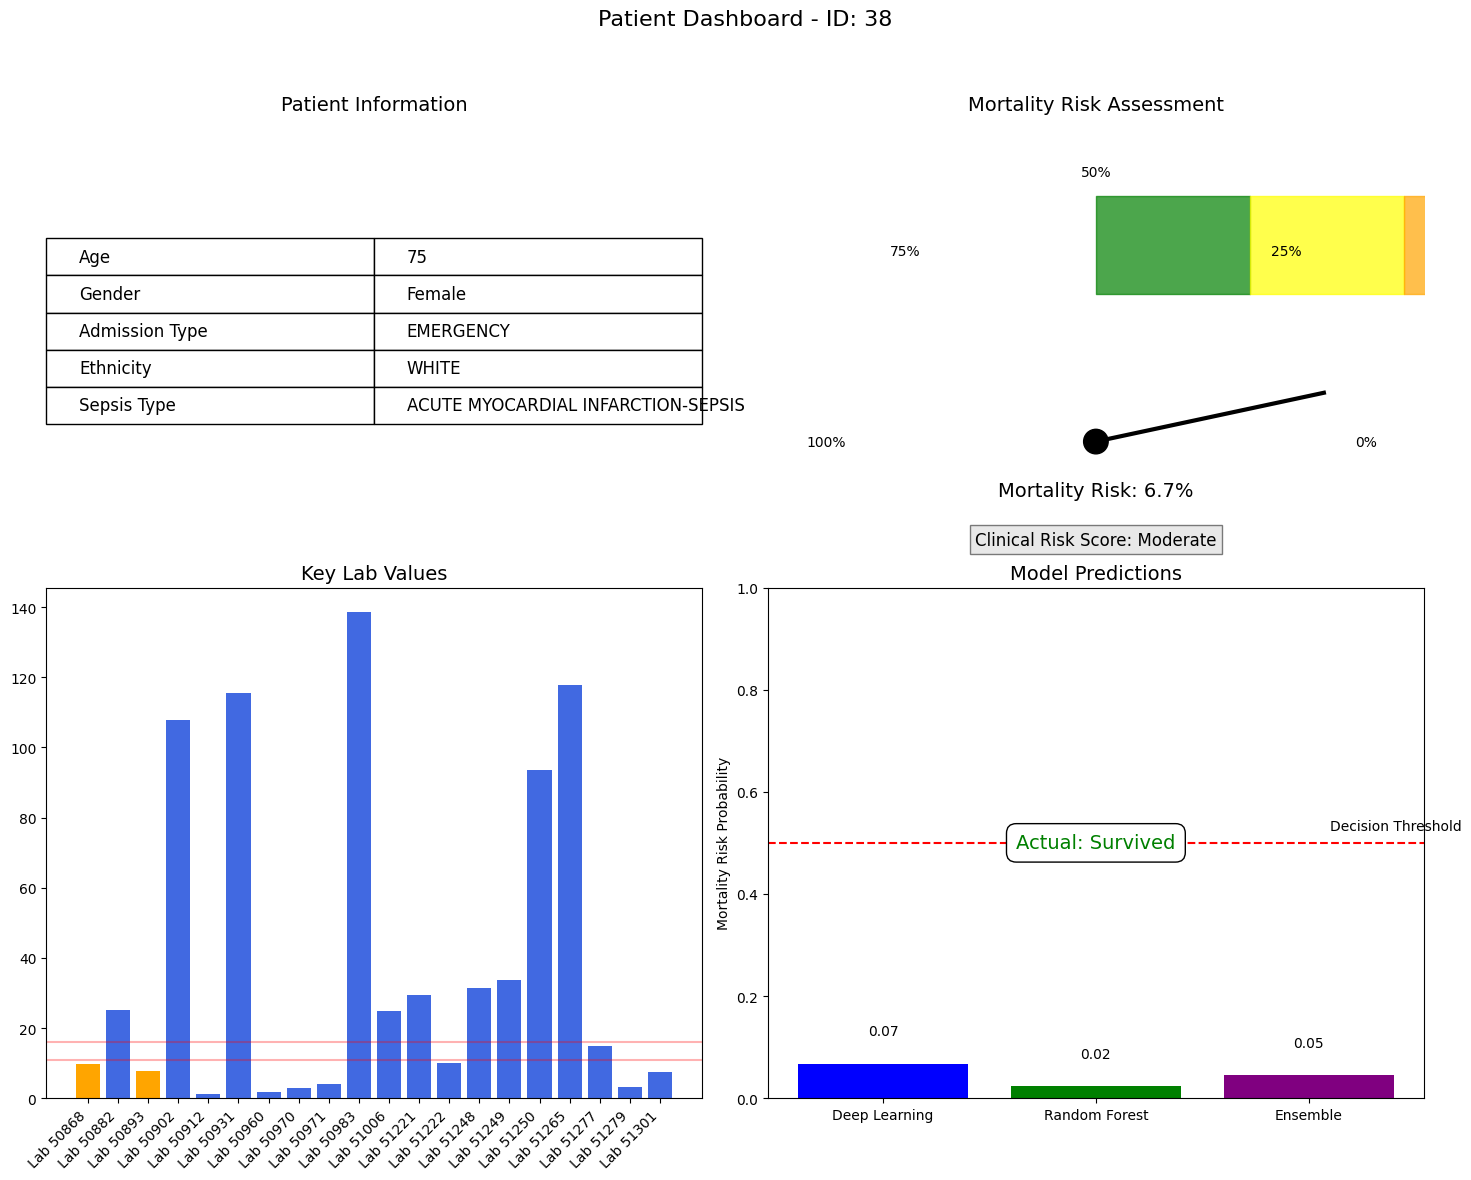

C:\Users\leon1\AppData\Local\Temp\ipykernel_35872\2618982627.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(lab_names, rotation=45, ha='right')
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Generating patient dashboard for patient 3...


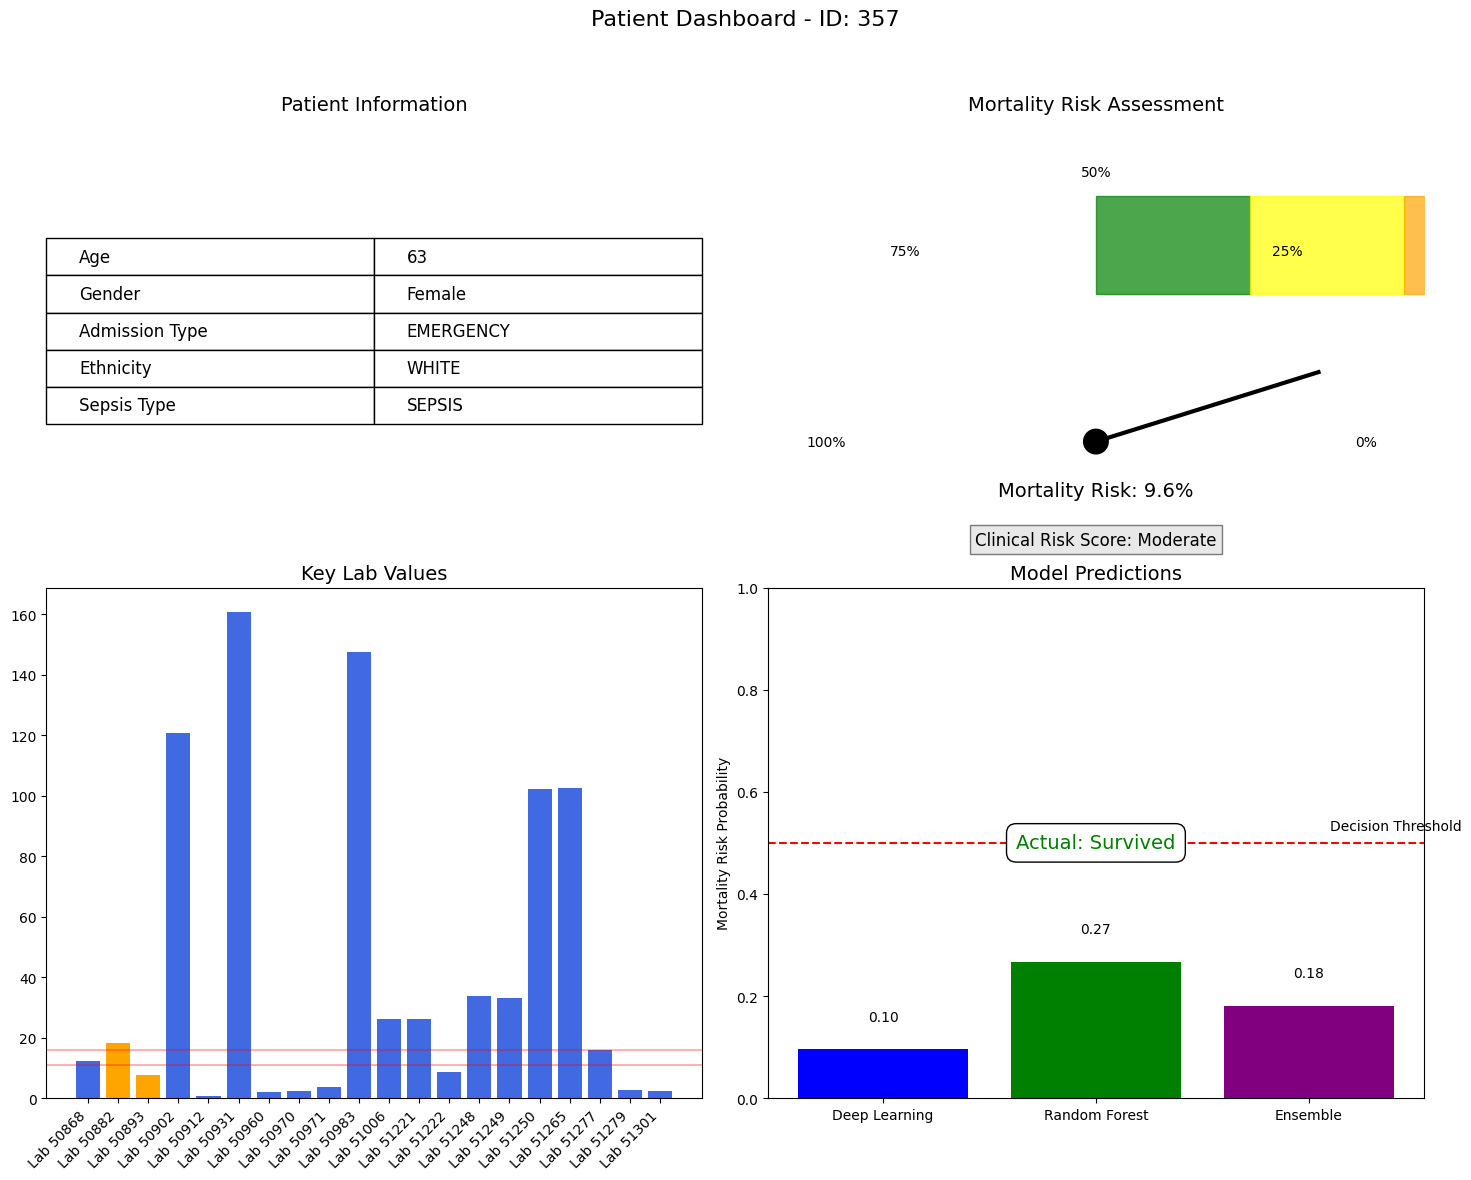

Visualization complete!
Generating clinical decision support guide...


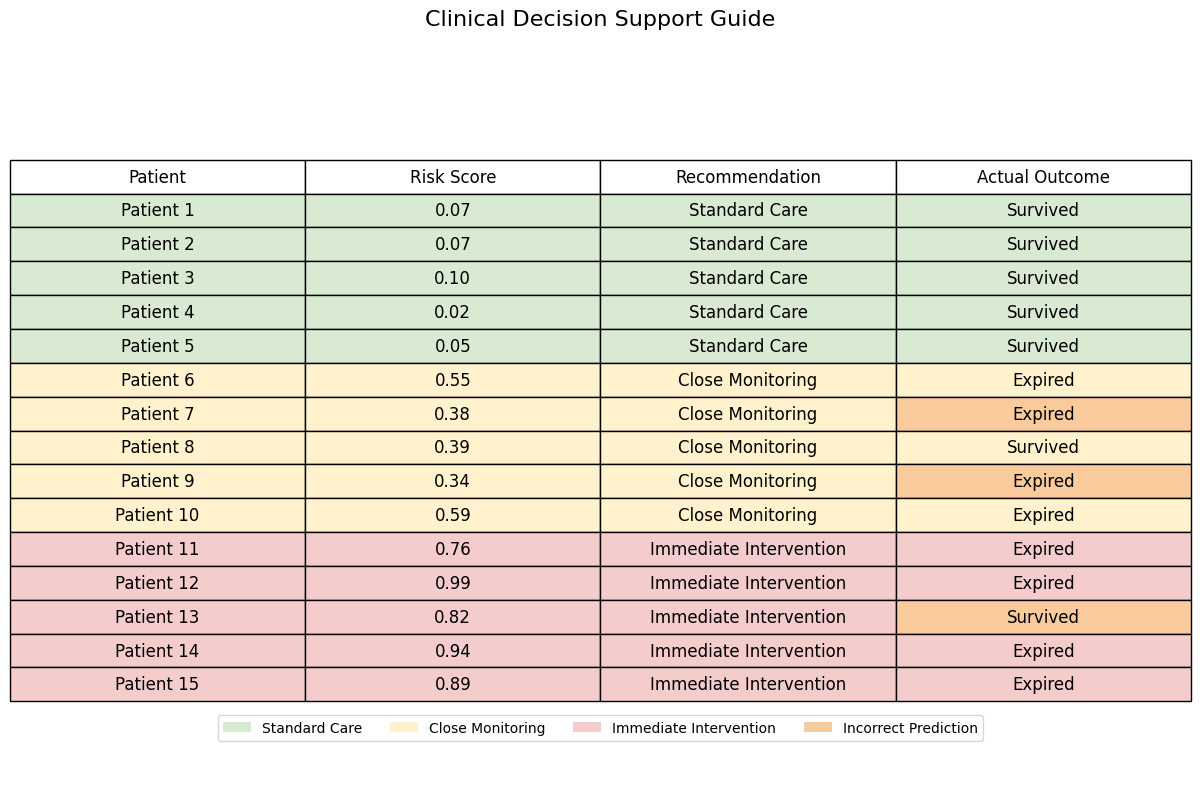

In [22]:
# Add this code to extend your Random Forest comparison with additional visualizations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

print("\nAdding advanced visualizations using matplotlib...")

# 1. Create an ROC curve with decision thresholds
def plot_roc_with_thresholds():
    fpr, tpr, thresholds = roc_curve(val_labels, val_preds)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    
    # Add markers for different thresholds
    selected_thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    threshold_indices = [np.argmin(np.abs(thresholds - t)) for t in selected_thresholds]
    
    for t, idx in zip(selected_thresholds, threshold_indices):
        plt.plot(fpr[idx], tpr[idx], 'ro', markersize=8)
        plt.annotate(f"{t:.1f}", (fpr[idx], tpr[idx]), 
                    textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Decision Thresholds')
    plt.legend(loc='lower right')
    plt.grid(True)
    return plt

# 2. Create a confusion matrix with annotations
def plot_confusion_matrix():
    val_preds_binary = (np.array(val_preds) >= 0.5).astype(int)
    cm = confusion_matrix(val_labels, val_preds_binary)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Survived', 'Expired'],
                yticklabels=['Survived', 'Expired'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    return plt

# 3. Create a patient risk stratification visualization
def plot_risk_stratification(predictions, actual_labels):
    # Create risk buckets
    risk_buckets = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    bucket_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
    
    # Count patients in each bucket
    digitized = np.digitize(predictions, risk_buckets) - 1
    counts = [np.sum(digitized == i) for i in range(len(bucket_labels))]
    
    # Calculate mortality rate in each bucket
    mortality_rates = []
    for i in range(len(bucket_labels)):
        bucket_indices = digitized == i
        if np.sum(bucket_indices) > 0:
            mortality_rates.append(np.mean(np.array(actual_labels)[bucket_indices]) * 100)
        else:
            mortality_rates.append(0)
    
    # Create figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 8))
    
    # Plot bars for patient count
    bars = ax1.bar(bucket_labels, counts, color='lightblue', alpha=0.7)
    ax1.set_xlabel('Risk Category')
    ax1.set_ylabel('Patient Count', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Add count labels on top of bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{count}', ha='center', va='bottom')
    
    # Create second y-axis for mortality rate
    ax2 = ax1.twinx()
    ax2.plot(bucket_labels, mortality_rates, 'r-o', linewidth=2, markersize=8)
    ax2.set_ylabel('Mortality Rate (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add mortality rate labels
    for i, rate in enumerate(mortality_rates):
        ax2.annotate(f'{rate:.1f}%', xy=(i, rate), xytext=(0, 5),
                    textcoords='offset points', ha='center', color='darkred')
    
    plt.title('Risk Stratification Analysis')
    fig.tight_layout()
    return plt

# 4. Create patient dashboard using matplotlib
def plot_patient_dashboard(patient_idx=0):
    # Get patient data
    patient_data = final_data.iloc[patient_idx]
    
    # Create a figure with multiple subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 12), gridspec_kw={'height_ratios': [1, 1.2]})
    
    # Patient info table (top left)
    axs[0, 0].axis('tight')
    axs[0, 0].axis('off')
    patient_info = [
        ['Age', patient_data['age']],
        ['Gender', 'Male' if 'GENDER_M' in patient_data and patient_data['GENDER_M'] else 'Female'],
        ['Admission Type', patient_data['ADMISSION_TYPE'] if 'ADMISSION_TYPE' in patient_data else 'N/A'],
        ['Ethnicity', patient_data['ETHNICITY'] if 'ETHNICITY' in patient_data else 'N/A'],
        ['Sepsis Type', patient_data['DIAGNOSIS'] if 'DIAGNOSIS' in patient_data else 'N/A']
    ]
    table = axs[0, 0].table(cellText=patient_info, loc='center', cellLoc='left')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)
    axs[0, 0].set_title('Patient Information', fontsize=14)
    
    # Risk gauge (top right) - create a colored gauge
    with torch.no_grad():
        model.eval()
        text_tensor = X_text_val_t[patient_idx].unsqueeze(0).to(device)
        struct_tensor = X_struct_val_t[patient_idx].unsqueeze(0).to(device)
        prediction = model(text_tensor, struct_tensor).item()
    
    # Create a semi-circle gauge
    axs[0, 1].axis('equal')
    risk_level = prediction * 100
    
    # Create gauge background
    theta = np.linspace(0, np.pi, 100)
    r = 1.0
    
    # Colored segments
    segments = [(0, 20, 'green'), (20, 40, 'yellow'), 
                (40, 60, 'orange'), (60, 100, 'red')]
    
    for start, end, color in segments:
        start_rad = start / 100 * np.pi
        end_rad = end / 100 * np.pi
        theta_segment = np.linspace(start_rad, end_rad, 30)
        axs[0, 1].fill_between(theta_segment, 0.6*r, r, color=color, alpha=0.7)
    
    # Needle
    risk_rad = risk_level / 100 * np.pi
    needle_length = 0.95
    axs[0, 1].plot([0, needle_length * np.cos(risk_rad)], 
                  [0, needle_length * np.sin(risk_rad)], 'k-', lw=3)
    axs[0, 1].add_patch(plt.Circle((0, 0), 0.05, color='black'))
    
    # Text labels
    for val, angle in zip([0, 25, 50, 75, 100], [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]):
        x = 1.1 * np.cos(angle)
        y = 1.1 * np.sin(angle)
        axs[0, 1].text(x, y, f"{val}%", ha='center', va='center')
        
    axs[0, 1].text(0, -0.2, f"Mortality Risk: {risk_level:.1f}%", 
                  ha='center', va='center', fontsize=14)
    
    axs[0, 1].set_xlim(-1.2, 1.2)
    axs[0, 1].set_ylim(-0.3, 1.2)
    axs[0, 1].axis('off')
    axs[0, 1].set_title('Mortality Risk Assessment', fontsize=14)
    
    # Clinical risk score
    struct_data_row = X_struct_val_t[patient_idx].cpu().numpy()
    clinical_risk = calculate_clinical_risk_score(struct_data_row)
    axs[0, 1].text(0, -0.4, f"Clinical Risk Score: {clinical_risk}", 
                  ha='center', va='center', fontsize=12,
                  bbox=dict(facecolor='lightgray', alpha=0.5))
    
    # Lab values bar chart (bottom left)
    lab_columns = [col for col in patient_data.index if col.startswith('lab_')]
    if lab_columns:
        lab_values = [patient_data[col] for col in lab_columns]
        lab_names = [f"Lab {col.split('_')[1]}" for col in lab_columns]
        
        # Add coloring based on normal ranges (simplified example)
        bar_colors = []
        for i, val in enumerate(lab_values):
            if i == 0 and (val < 11 or val > 16):  # Hemoglobin
                bar_colors.append('orange')
            elif i == 1 and (val < 20 or val > 30):  # BUN
                bar_colors.append('orange')
            elif i == 2 and (val < 95 or val > 105):  # Glucose
                bar_colors.append('orange')
            else:
                bar_colors.append('royalblue')
                
        axs[1, 0].bar(lab_names, lab_values, color=bar_colors)
        axs[1, 0].set_title('Key Lab Values', fontsize=14)
        axs[1, 0].set_xticklabels(lab_names, rotation=45, ha='right')
        
        # Add reference ranges
        axs[1, 0].axhline(y=11, color='r', linestyle='-', alpha=0.3)
        axs[1, 0].axhline(y=16, color='r', linestyle='-', alpha=0.3)
    
    # Model comparison (bottom right)
    # First, get Random Forest prediction
    rf_prediction = rf_val_probs[patient_idx]
    
    models = ['Deep Learning', 'Random Forest', 'Ensemble']
    scores = [prediction, rf_prediction, (prediction + rf_prediction)/2]
    colors = ['blue', 'green', 'purple']
    
    axs[1, 1].bar(models, scores, color=colors)
    axs[1, 1].set_ylim(0, 1.0)
    axs[1, 1].set_title('Model Predictions', fontsize=14)
    axs[1, 1].set_ylabel('Mortality Risk Probability')
    
    # Add actual outcome if available
    if patient_idx < len(val_labels):
        outcome = "Expired" if val_labels[patient_idx] == 1 else "Survived"
        outcome_color = "red" if val_labels[patient_idx] == 1 else "green"
        axs[1, 1].text(1.0, 0.5, f"Actual: {outcome}", 
                      ha='center', va='center', fontsize=14,
                      color=outcome_color,
                      bbox=dict(facecolor='white', boxstyle='round,pad=0.5'))
    
    # Add horizontal line at 0.5 threshold
    axs[1, 1].axhline(y=0.5, color='r', linestyle='--')
    axs[1, 1].text(2.1, 0.52, 'Decision Threshold', 
                  ha='left', va='bottom', fontsize=10)
    
    for i, score in enumerate(scores):
        axs[1, 1].text(i, score + 0.05, f"{score:.2f}", 
                      ha='center', va='bottom')
        
    # Overall title
    plt.suptitle(f"Patient Dashboard - ID: {patient_data['SUBJECT_ID'] if 'SUBJECT_ID' in patient_data else 'N/A'}", 
                fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    return plt

# Execute the visualizations
print("Generating matplotlib visualizations...")

# 1. Display ROC curve with thresholds
print("Generating enhanced ROC curve...")
roc_plt = plot_roc_with_thresholds()
roc_plt.show()

# 2. Confusion matrix
print("Generating confusion matrix...")
cm_plt = plot_confusion_matrix()
cm_plt.show()

# 3. Risk stratification
print("Generating risk stratification chart...")
risk_plt = plot_risk_stratification(val_preds, val_labels)
risk_plt.show()

# 4. Patient dashboard for the first few patients
for i in range(min(3, len(val_labels))):
    print(f"Generating patient dashboard for patient {i+1}...")
    try:
        dashboard = plot_patient_dashboard(i)
        dashboard.show()
    except Exception as e:
        print(f"Error creating dashboard for patient {i}: {e}")

print("Visualization complete!")

# Add clinical risk stratification calculation (same as before)
def calculate_clinical_risk_score(structured_data_row):
    """
    Calculate a simplified clinical risk score based on common parameters
    This is just an example - real scores like SOFA or APACHE are much more complex
    """
    score = 0
    
    # Age factor
    if structured_data_row[0] > 80:  # first value is age
        score += 4
    elif structured_data_row[0] > 65:
        score += 3
    elif structured_data_row[0] > 50:
        score += 2
    elif structured_data_row[0] > 35:
        score += 1
        
    # Lab value factors (simplified)
    lab_values = structured_data_row[2:]  # Skip age and gender
    abnormal_count = 0
    
    # Count values outside normal ranges
    # These thresholds are arbitrary for demonstration
    for i, val in enumerate(lab_values):
        if i == 0 and (val < 11 or val > 16):  # Hemoglobin
            abnormal_count += 1
        elif i == 1 and (val < 20 or val > 30):  # BUN
            abnormal_count += 1
        elif i == 2 and (val < 95 or val > 105):  # Glucose
            abnormal_count += 1
            
    score += min(abnormal_count, 3)
    
    # Convert to risk category
    if score >= 6:
        return "Very High"
    elif score >= 4:
        return "High"
    elif score >= 3:
        return "Moderate"
    elif score >= 1:
        return "Low"
    else:
        return "Very Low"

# Create a decision support visualization
def plot_decision_support():
    """Create a visualization to help with clinical decision making"""
    # Sample patients with different risk levels
    low_risk_idx = np.where(np.array(val_preds) < 0.3)[0][:5]
    med_risk_idx = np.where((np.array(val_preds) >= 0.3) & (np.array(val_preds) < 0.6))[0][:5]
    high_risk_idx = np.where(np.array(val_preds) >= 0.6)[0][:5]
    
    sample_indices = list(low_risk_idx) + list(med_risk_idx) + list(high_risk_idx)
    sample_risks = [val_preds[idx] for idx in sample_indices]
    sample_outcomes = [val_labels[idx] for idx in sample_indices]
    
    # Create sample data frame
    recommendations = []
    for risk in sample_risks:
        if risk < 0.3:
            recommendations.append("Standard Care")
        elif risk < 0.6:
            recommendations.append("Close Monitoring")
        else:
            recommendations.append("Immediate Intervention")
    
    sample_df = pd.DataFrame({
        'Patient': [f'Patient {i+1}' for i in range(len(sample_indices))],
        'Risk Score': [f'{r:.2f}' for r in sample_risks],
        'Recommendation': recommendations,
        'Actual Outcome': ['Expired' if o == 1 else 'Survived' for o in sample_outcomes]
    })
    
    # Create a visual guide for treatment
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('tight')
    ax.axis('off')
    
    # Color mapping for recommendations
    colors = []
    for rec in recommendations:
        if rec == "Standard Care":
            colors.append(['#d9ead3', '#d9ead3', '#d9ead3', '#d9ead3'])  # light green
        elif rec == "Close Monitoring":
            colors.append(['#fff2cc', '#fff2cc', '#fff2cc', '#fff2cc'])  # light yellow
        else:
            colors.append(['#f4cccc', '#f4cccc', '#f4cccc', '#f4cccc'])  # light red
    
    # Highlight cells with incorrect predictions
    for i, (risk, outcome) in enumerate(zip(sample_risks, sample_outcomes)):
        risk_binary = 1 if risk >= 0.5 else 0
        if risk_binary != outcome:
            colors[i][3] = '#f9cb9c'  # orange for incorrect predictions
    
    table = ax.table(cellText=sample_df.values, colLabels=sample_df.columns,
                    cellColours=colors, loc='center', cellLoc='center')
    
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.8)
    
    # Add title and legend
    plt.suptitle('Clinical Decision Support Guide', fontsize=16)
    
    # Add color legend manually
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, facecolor='#d9ead3', label='Standard Care'),
        plt.Rectangle((0, 0), 1, 1, facecolor='#fff2cc', label='Close Monitoring'),
        plt.Rectangle((0, 0), 1, 1, facecolor='#f4cccc', label='Immediate Intervention'),
        plt.Rectangle((0, 0), 1, 1, facecolor='#f9cb9c', label='Incorrect Prediction')
    ]
    
    ax.legend(handles=legend_elements, loc='upper center', 
             bbox_to_anchor=(0.5, 0.1), ncol=4)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    return plt

# Generate decision support visualization
print("Generating clinical decision support guide...")
decision_plt = plot_decision_support()
decision_plt.show()

# Create an interactive demo function
def mortality_prediction_demo(age, gender, lab_values):
    """Interactive demo function for making mortality predictions"""
    # Process inputs
    gender_vector = [0, 1] if gender.lower() == 'm' else [1, 0]
    input_vector = [age] + gender_vector + lab_values
    
    # Convert to tensor
    structured_input = torch.tensor([input_vector], dtype=torch.float32).to(device)
    
    # Use an average text embedding for demo purposes
    avg_text_embedding = torch.mean(X_text_val_t, dim=0, keepdim=True).to(device)
    
    # Get prediction
    model.eval()
    with torch.no_grad():
        prediction = model(avg_text_embedding, structured_input).item()
    
    return {
        'Mortality Risk': f"{prediction:.2%}",
        'Risk Category': "High" if prediction > 0.6 else "Moderate" if prediction > 0.3 else "Low",
        'Clinical Risk Score': calculate_clinical_risk_score(input_vector),
        'Recommended Action': "Immediate Intervention" if prediction > 0.6 else 
                             "Close Monitoring" if prediction > 0.3 else "Standard Care"
    }

# Example usage of the demo function

